# Chapter 4 + Chapter 5 + Chapter 6

# Plots for weekly data, Univariate modeling for weekly data, VAR-DCC models for weekly data, VAR models for weekly data

In [103]:
library(rugarch)
library(rmgarch)
library(moments)
library(forecast)
library(MTS)
library(vars)
library(xts)
library(stargazer)
library(tseries)
options(repr.plot.width = 20)

# Dataset preparation

In [104]:
fr_w <- readRDS("fr_w.Rds")
fp_w <- readRDS("fp_w.Rds")
cr_w <- readRDS("cr_w.Rds")
cp_w <- readRDS("cp_w.Rds")
head(fr_w)
tail(fr_w)
head(cr_w)
tail(cr_w)
us_w <- cr_w[,1]
l_w <- cr_w[,2]

                 eurusd       gbpusd       chfusd       usdgbp        eurgbp
2007-07-13  0.011345725  0.011768041  0.012707420 -0.012031893 -0.0009595159
2007-07-20  0.003150978  0.010561671  0.001682187 -0.010223993 -0.0067425143
2007-07-27 -0.014056529 -0.015439970 -0.006685362  0.015297055  0.0008917293
2007-08-03  0.010216084  0.007480166  0.014875514 -0.007721262  0.0031888492
2007-08-10 -0.005898004 -0.007776587 -0.006690586  0.007822461  0.0022187717
2007-08-17 -0.016011531 -0.021627054 -0.007943236  0.021424385  0.0050110643
                  chfgbp       ghsusd       ghsgbp
2007-07-13  0.0009570421  0.004005436 -0.008009262
2007-07-20 -0.0088982748  0.002202455 -0.008376197
2007-07-27  0.0087979629 -0.003802426  0.011804209
2007-08-03  0.0074008865 -0.002685547 -0.009823491
2007-08-10  0.0010801929 -0.004550623  0.002725996
2007-08-17  0.0136908894  0.007384225  0.028262443

                 eurusd       gbpusd        chfusd       usdgbp       eurgbp
2024-03-29 -0.001111008  0.001744094 -0.0047696275 -0.001639758 -0.003269503
2024-04-05  0.003883141  0.001029173  0.0005411012 -0.001136794  0.002803085
2024-04-12 -0.018063806 -0.014867051 -0.0138903731  0.014927523 -0.003037031
2024-04-19  0.001173792 -0.006324418  0.0043785703  0.006268057  0.007691449
2024-04-26  0.003606646  0.009491706 -0.0043785703 -0.009510561 -0.006171781
2024-05-03  0.006152718  0.004433357  0.0094627884 -0.004381579  0.001867196
                  chfgbp       ghsusd       ghsgbp
2024-03-29 -0.0064137348 -0.015207144 -0.016876113
2024-04-05 -0.0005126015 -0.007520957 -0.008626210
2024-04-12  0.0009680267 -0.007463621  0.007446289
2024-04-19  0.0106995275  0.000000000  0.006285208
2024-04-26 -0.0138918686 -0.010349197 -0.019840737
2024-05-03  0.0050119709 -0.010258321 -0.014688795

                   usc           lc
2007-07-13 -0.02286903 -0.034778360
2007-07-20  0.02522142  0.003623192
2007-07-27 -0.07969033 -0.061529190
2007-08-03 -0.01849051 -0.036225204
2007-08-10 -0.03965627 -0.027288202
2007-08-17 -0.04129406 -0.023847683

                     usc          lc
2024-03-29  0.1057665488  0.12489565
2024-04-05  0.0006445376 -0.01368545
2024-04-12  0.1176875748  0.12562621
2024-04-19  0.0899585017  0.12954487
2024-04-26 -0.0786621644 -0.09105893
2024-05-03 -0.2628835611 -0.26525294

In [105]:
w <- na.omit(merge(cr_w,fr_w))
colnames(w) <- c("US Cocoa","London Cocoa","EURUSD","GBPUSD","CHFUSD","USDGBP","EURGBP","CHFGBP","GHSUSD","GHSGBP")
str(w)
head(w)
tail(w)

An xts object on 2007-07-13 / 2024-05-03 containing: 
  Data:    double [878, 10]
  Columns: US Cocoa, London Cocoa, EURUSD, GBPUSD, CHFUSD ... with 5 more columns
  Index:   Date [878] (TZ: "UTC")
  xts Attributes:
    $ ret_type        : chr "log"
    $ coredata_content: chr "logReturn"


              US Cocoa London Cocoa       EURUSD       GBPUSD       CHFUSD
2007-07-13 -0.02286903 -0.034778360  0.011345725  0.011768041  0.012707420
2007-07-20  0.02522142  0.003623192  0.003150978  0.010561671  0.001682187
2007-07-27 -0.07969033 -0.061529190 -0.014056529 -0.015439970 -0.006685362
2007-08-03 -0.01849051 -0.036225204  0.010216084  0.007480166  0.014875514
2007-08-10 -0.03965627 -0.027288202 -0.005898004 -0.007776587 -0.006690586
2007-08-17 -0.04129406 -0.023847683 -0.016011531 -0.021627054 -0.007943236
                 USDGBP        EURGBP        CHFGBP       GHSUSD       GHSGBP
2007-07-13 -0.012031893 -0.0009595159  0.0009570421  0.004005436 -0.008009262
2007-07-20 -0.010223993 -0.0067425143 -0.0088982748  0.002202455 -0.008376197
2007-07-27  0.015297055  0.0008917293  0.0087979629 -0.003802426  0.011804209
2007-08-03 -0.007721262  0.0031888492  0.0074008865 -0.002685547 -0.009823491
2007-08-10  0.007822461  0.0022187717  0.0010801929 -0.004550623  0.002725996
2007-08

                US Cocoa London Cocoa       EURUSD       GBPUSD        CHFUSD
2024-03-29  0.1057665488   0.12489565 -0.001111008  0.001744094 -0.0047696275
2024-04-05  0.0006445376  -0.01368545  0.003883141  0.001029173  0.0005411012
2024-04-12  0.1176875748   0.12562621 -0.018063806 -0.014867051 -0.0138903731
2024-04-19  0.0899585017   0.12954487  0.001173792 -0.006324418  0.0043785703
2024-04-26 -0.0786621644  -0.09105893  0.003606646  0.009491706 -0.0043785703
2024-05-03 -0.2628835611  -0.26525294  0.006152718  0.004433357  0.0094627884
                 USDGBP       EURGBP        CHFGBP       GHSUSD       GHSGBP
2024-03-29 -0.001639758 -0.003269503 -0.0064137348 -0.015207144 -0.016876113
2024-04-05 -0.001136794  0.002803085 -0.0005126015 -0.007520957 -0.008626210
2024-04-12  0.014927523 -0.003037031  0.0009680267 -0.007463621  0.007446289
2024-04-19  0.006268057  0.007691449  0.0106995275  0.000000000  0.006285208
2024-04-26 -0.009510561 -0.006171781 -0.0138918686 -0.010349197 -0.01

# Return plots for weekly data (Apendix A)

## Cocoa Futures Weekly returns plots (Figure A.2)

In [106]:
head(cr_w)

                   usc           lc
2007-07-13 -0.02286903 -0.034778360
2007-07-20  0.02522142  0.003623192
2007-07-27 -0.07969033 -0.061529190
2007-08-03 -0.01849051 -0.036225204
2007-08-10 -0.03965627 -0.027288202
2007-08-17 -0.04129406 -0.023847683

In [107]:
pdf("us_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cr_w[,1], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [108]:
pdf("l_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cr_w[,2], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## USD-denominated currency pairs weekly returns (Figure A.4)

In [109]:
pdf("eurusd_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,1], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [110]:
pdf("gbpusd_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,2], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [111]:
pdf("chfusd_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,3], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [112]:
pdf("ghsusd_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,7], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## GBP-denominated currency pairs weekly returns (Figure A.6)

In [113]:
pdf("usdgbp_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,4], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [114]:
pdf("eurgbp_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,5], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [115]:
pdf("chfgbp_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,6], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [116]:
pdf("ghsgbp_returns_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_w[,8], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# Univariate modeling for weekly returns (Section 6.1)

## London Cocoa

In [117]:
l_spec_norm <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "norm")
l_fit_norm <- ugarchfit(data = l_w,spec = l_spec_norm)

In [118]:
l_spec_std <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "std")
l_fit_std <- ugarchfit(data = l_w,spec = l_spec_std)

In [119]:
l_cocoa_garch_inf <- data.frame(Model = c("norm","std"),AIC = c(infocriteria(l_fit_norm)["Akaike",],infocriteria(l_fit_std)["Akaike",]),
                                BIC = c(infocriteria(l_fit_norm)["Bayes",],infocriteria(l_fit_std)["Bayes",]),
                              log_lig = c(likelihood(l_fit_norm),likelihood(l_fit_std)))
l_cocoa_garch_inf

Model,AIC,BIC,log_lig
<chr>,<dbl>,<dbl>,<dbl>
norm,-4.094979,-4.073213,1801.696
std,-4.099607,-4.072399,1804.727


### Parameter Estimates for London Cocoa

In [120]:
l_garch_n <- data.frame("Parameters" = c("mu","omega","alpha1","beta1"),
                       "Coefficient" = c(l_fit_norm@fit$coef["mu"],l_fit_norm@fit$coef["omega"],
                            l_fit_norm@fit$coef["alpha1"],l_fit_norm@fit$coef["beta1"]),
                      "Std. Errors" = c(l_fit_norm@fit$se.coef[1],l_fit_norm@fit$se.coef[2],l_fit_norm@fit$se.coef[3],l_fit_norm@fit$se.coef[4]))
l_garch_n

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,1.850950e-03,9.271567e-04
omega,omega,2.156975e-05,1.123264e-05
alpha1,alpha1,1.204110e-01,2.327212e-02
beta1,beta1,8.698572e-01,2.585516e-02


In [121]:
l_garch_t <- data.frame("Parameters" = c("mu","omega","alpha1","beta1","shape"),
                       "Coefficient" = c(l_fit_std@fit$coef["mu"],l_fit_std@fit$coef["omega"],
                            l_fit_std@fit$coef["alpha1"],l_fit_std@fit$coef["beta1"],l_fit_std@fit$coef["shape"]),
                      "Std. Errors" = c(l_fit_std@fit$se.coef[1],l_fit_std@fit$se.coef[2],l_fit_std@fit$se.coef[3],l_fit_std@fit$se.coef[4],l_fit_std@fit$se.coef[5]))
l_garch_t

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,1.904946e-03,9.318593e-04
omega,omega,1.829602e-05,1.103272e-05
alpha1,alpha1,1.051227e-01,2.394173e-02
beta1,beta1,8.862950e-01,2.663314e-02
shape,shape,1.564942e+01,7.057723e+00


In [122]:
l_n <- rep(NA,4)
for(i in 1:4){
    l_n[i] = paste0(round(l_garch_n[i,2],4)," (",round(l_garch_n[i,3],4),")")
}

l_t <- rep(NA,5)
for(i in 1:5){
    l_t[i] = paste0(round(l_garch_t[i,2],4)," (",round(l_garch_t[i,3],4),")")
}

## US Cocoa

In [123]:
auto.arima(us_w)

Series: us_w 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.00155:  log likelihood = 1594.15
AIC=-3186.31   AICc=-3186.3   BIC=-3181.53

In [124]:
us_spec_norm <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "norm")
us_fit_norm <- ugarchfit(data = us_w,spec = us_spec_norm)

In [125]:
us_spec_std <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "std")
us_fit_std <- ugarchfit(data = us_w,spec = us_spec_std)

In [126]:
us_cocoa_garch_inf <- data.frame(Model = c("norm","std"),AIC = c(infocriteria(us_fit_norm)["Akaike",],infocriteria(us_fit_std)["Akaike",]),
                                 BIC = c(infocriteria(us_fit_norm)["Bayes",],infocriteria(us_fit_std)["Bayes",]),
                              log_lig = c(likelihood(us_fit_norm),likelihood(us_fit_std)))
us_cocoa_garch_inf

Model,AIC,BIC,log_lig
<chr>,<dbl>,<dbl>,<dbl>
norm,-3.796316,-3.774550,1670.583
std,-3.809942,-3.782734,1677.564


### Parameter estimates for the univariate GARCH(1,1) model for US Cocoa

In [127]:
us_garch_n <- data.frame("Parameters" = c("mu","omega","alpha1","beta1"),
                       "Coefficient" = c(us_fit_norm@fit$coef["mu"],us_fit_norm@fit$coef["omega"],
                            us_fit_norm@fit$coef["alpha1"],us_fit_norm@fit$coef["beta1"]),
                      "Std. Errors" = c(us_fit_norm@fit$se.coef[1],us_fit_norm@fit$se.coef[2],us_fit_norm@fit$se.coef[3],us_fit_norm@fit$se.coef[4]))
us_garch_n

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,1.195285e-03,1.097199e-03
omega,omega,4.582901e-05,2.146331e-05
alpha1,alpha1,1.191334e-01,2.386638e-02
beta1,beta1,8.576772e-01,3.059058e-02


In [128]:
us_garch_t <- data.frame("Parameters" = c("mu","omega","alpha1","beta1","shape"),
                       "Coefficient" = c(us_fit_std@fit$coef["mu"],us_fit_std@fit$coef["omega"],
                            us_fit_std@fit$coef["alpha1"],us_fit_std@fit$coef["beta1"],us_fit_std@fit$coef["shape"]),
                      "Std. Errors" = c(us_fit_std@fit$se.coef[1],us_fit_std@fit$se.coef[2],us_fit_std@fit$se.coef[3],
                                        us_fit_std@fit$se.coef[4],us_fit_std@fit$se.coef[5]))
us_garch_t

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,1.625497e-03,1.095758e-03
omega,omega,3.065768e-05,1.819246e-05
alpha1,alpha1,9.655439e-02,2.410351e-02
beta1,beta1,8.887066e-01,2.935552e-02
shape,shape,1.182755e+01,3.995056e+00


In [129]:
us_n <- rep(NA,4)
for(i in 1:4){
    us_n[i] = paste0(round(us_garch_n[i,2],4)," (",round(us_garch_n[i,3],4),")")
}

us_t <- rep(NA,5)
for(i in 1:5){
    us_t[i] = paste0(round(us_garch_t[i,2],4)," (",round(us_garch_t[i,3],4),")")
}
us_t

[1] "0.0016 (0.0011)"  "0 (0)"            "0.0966 (0.0241)"  "0.8887 (0.0294)" 
[5] "11.8276 (3.9951)"

In [130]:
round(us_fit_norm@fit$matcoef,4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0012,0.0011,1.0894,0.2760
omega,0.0000,0.0000,2.1352,0.0327
alpha1,0.1191,0.0239,4.9917,0.0000
beta1,0.8577,0.0306,28.0373,0.0000


In [131]:
round(us_fit_std@fit$matcoef,4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0016,0.0011,1.4834,0.1380
omega,0.0000,0.0000,1.6852,0.0920
alpha1,0.0966,0.0241,4.0058,0.0001
beta1,0.8887,0.0294,30.2739,0.0000
shape,11.8276,3.9951,2.9605,0.0031


In [132]:
round(l_fit_norm@fit$matcoef,4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0019,0.0009,1.9964,0.0459
omega,0.0000,0.0000,1.9203,0.0548
alpha1,0.1204,0.0233,5.1740,0.0000
beta1,0.8699,0.0259,33.6435,0.0000


In [133]:
round(l_fit_std@fit$matcoef,4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0019,0.0009,2.0442,0.0409
omega,0.0000,0.0000,1.6583,0.0972
alpha1,0.1051,0.0239,4.3908,0.0000
beta1,0.8863,0.0266,33.2779,0.0000
shape,15.6494,7.0577,2.2173,0.0266


## Summary for US and London Cocoa for normal and St-t distributed errors (Table 6.1 - Weekly)

In [134]:
ug <- data.frame("Parameters" = c("mu","omega","alpha1","beta1","shape","AIC","BIC","lik"),"US Cocoa (norm)" = c(us_n,NA,round(infocriteria(us_fit_norm)["Akaike",],4),
                 round(infocriteria(us_fit_norm)["Bayes",],4),round(likelihood(us_fit_norm),4)),
                 "US Cocoa (Student t)" = c(us_t,round(infocriteria(us_fit_std)["Akaike",],4),round(infocriteria(us_fit_std)["Bayes",],4),round(likelihood(us_fit_std),4)),
                "London Cocoa (norm)" = c(l_n,NA,round(infocriteria(l_fit_norm)["Akaike",],4),round(infocriteria(l_fit_norm)["Bayes",],4),round(likelihood(l_fit_norm),4)),
                 "London Cocoa (Student t)" = c(l_t,round(infocriteria(l_fit_std)["Akaike",],4),round(infocriteria(l_fit_std)["Bayes",],4),round(likelihood(l_fit_std),4)))
ug

Parameters,US.Cocoa..norm.,US.Cocoa..Student.t.,London.Cocoa..norm.,London.Cocoa..Student.t.
<chr>,<chr>,<chr>,<chr>,<chr>
mu,0.0012 (0.0011),0.0016 (0.0011),0.0019 (9e-04),0.0019 (9e-04)
omega,0 (0),0 (0),0 (0),0 (0)
alpha1,0.1191 (0.0239),0.0966 (0.0241),0.1204 (0.0233),0.1051 (0.0239)
beta1,0.8577 (0.0306),0.8887 (0.0294),0.8699 (0.0259),0.8863 (0.0266)
shape,NA,11.8276 (3.9951),NA,15.6494 (7.0577)
AIC,-3.7963,-3.8099,-4.095,-4.0996
BIC,-3.7746,-3.7827,-4.0732,-4.0724
lik,1670.5828,1677.5644,1801.6957,1804.7274


# Plots of weekly conditional vol estimates (Fig A.7)

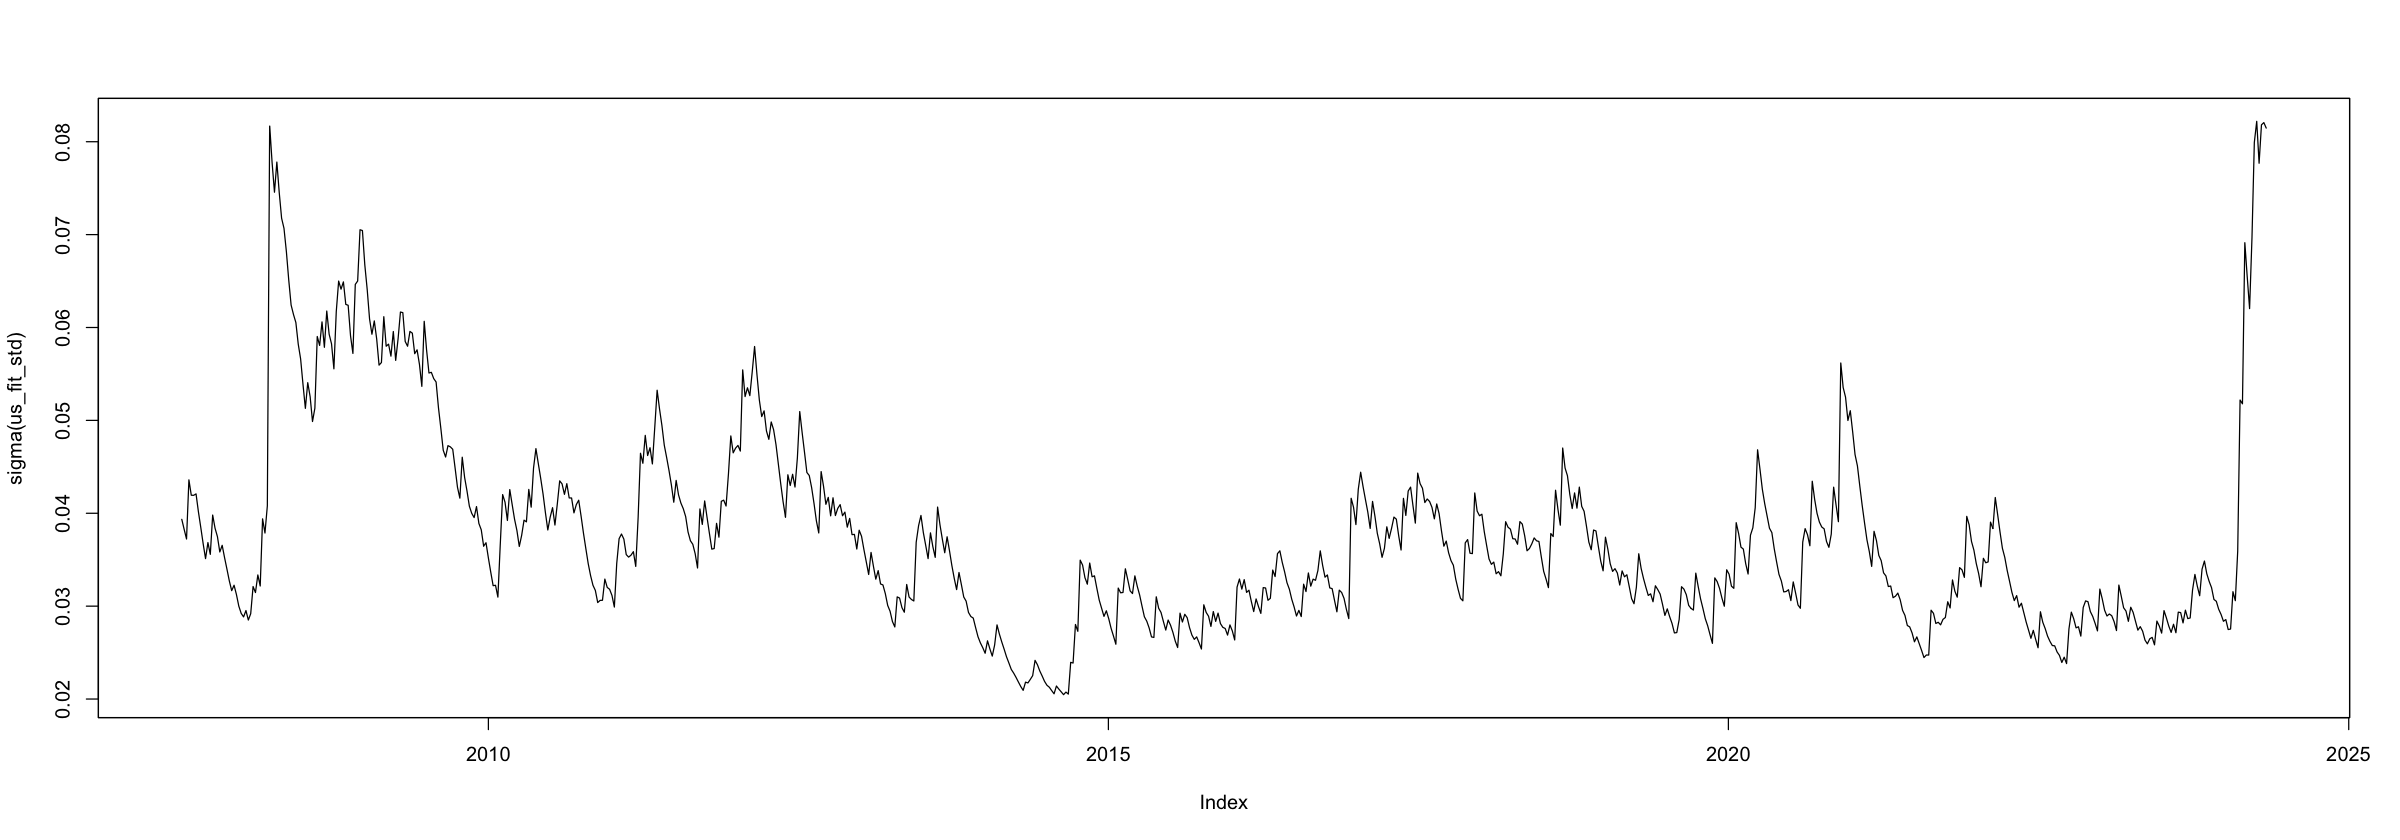

In [135]:
plot.zoo(sigma(us_fit_std))

In [136]:
pdf("l_sigma_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(sigma(l_fit_std), xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

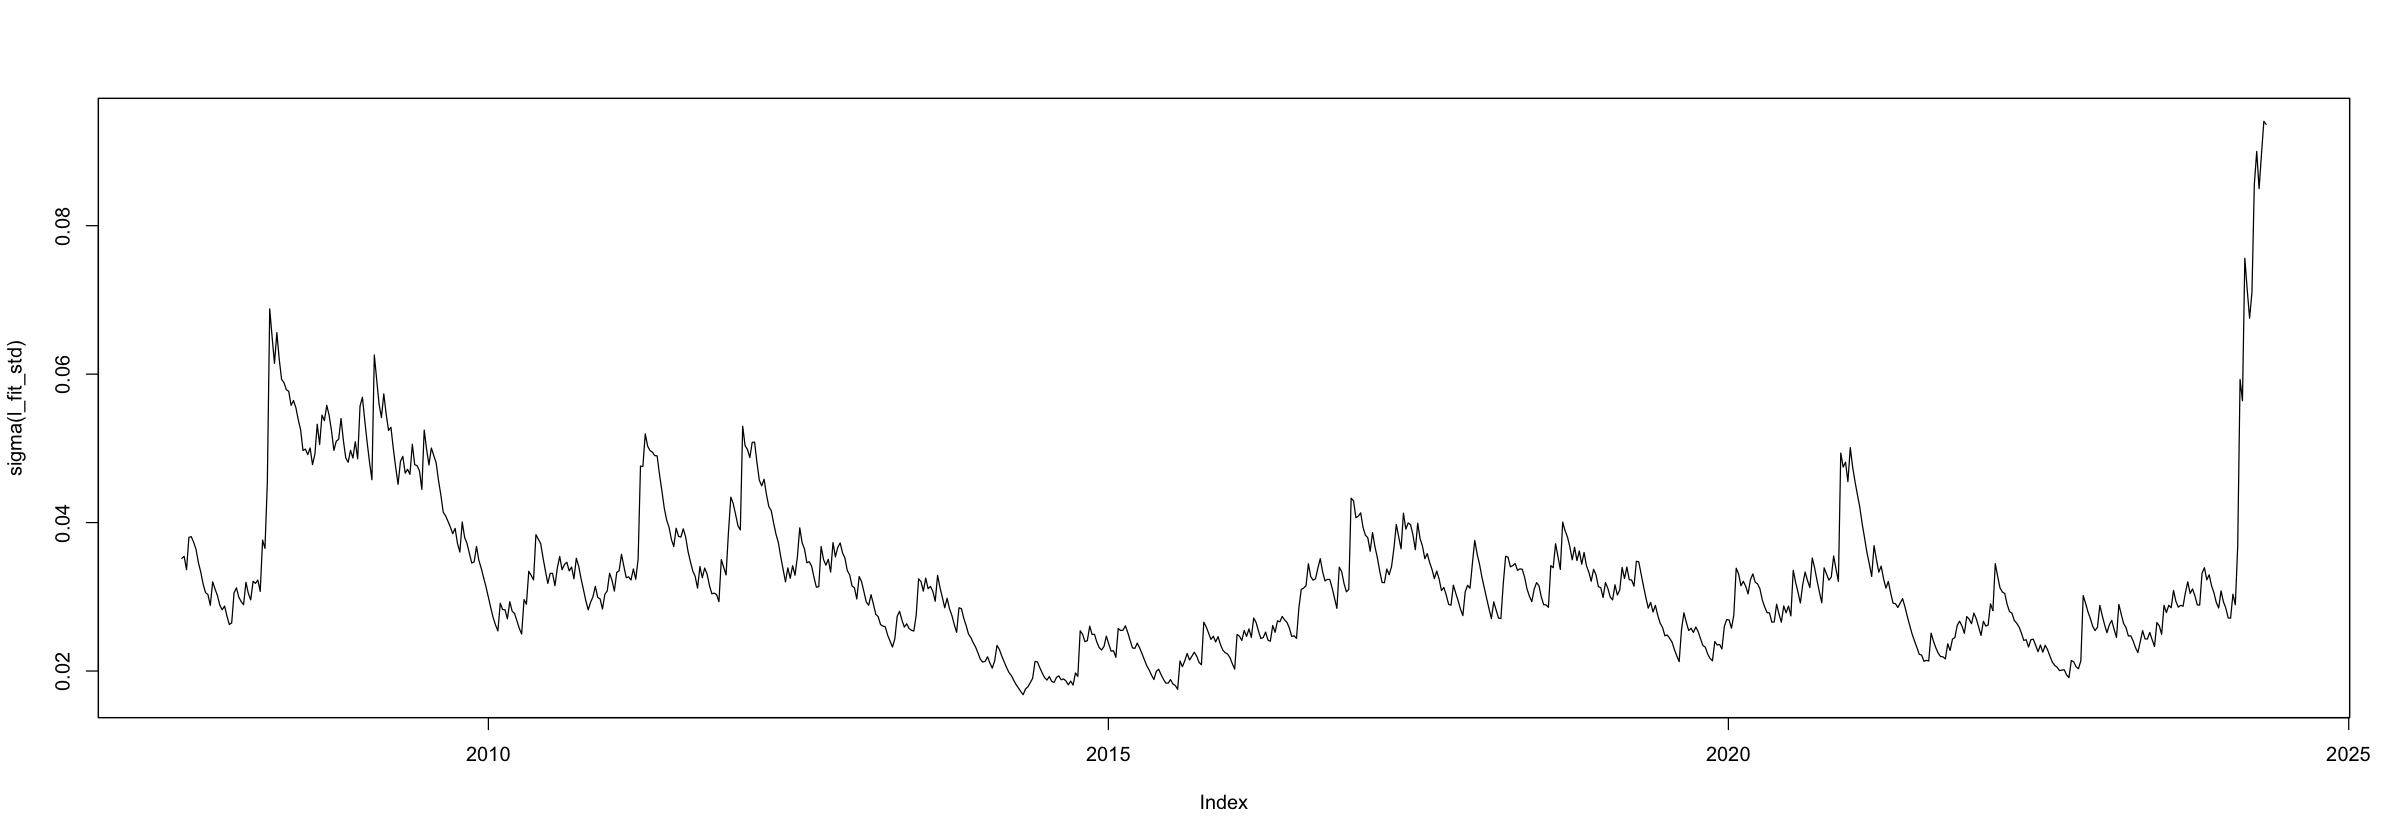

In [137]:
plot.zoo(sigma(l_fit_std))

In [138]:
pdf("us_sigma_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(sigma(us_fit_std), xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# VAR-DCC-GARCH for weekly data (Section 6.2)

In [139]:
VARselect(cr_w)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-1.484548e+01,-1.483818e+01,-1.483208e+01,-1.482400e+01,-1.481934e+01,-1.481394e+01,-1.481237e+01,-1.481206e+01,-1.481529e+01,-1.480736e+01
HQ(n),-1.483287e+01,-1.481717e+01,-1.480266e+01,-1.478618e+01,-1.477311e+01,-1.475931e+01,-1.474933e+01,-1.474062e+01,-1.473545e+01,-1.471911e+01
SC(n),-1.481253e+01,-1.478327e+01,-1.475520e+01,-1.472516e+01,-1.469853e+01,-1.467117e+01,-1.464764e+01,-1.462536e+01,-1.460664e+01,-1.457674e+01
FPE(n),3.570179e-07,3.596344e-07,3.618362e-07,3.647702e-07,3.664761e-07,3.684603e-07,3.690393e-07,3.691551e-07,3.679643e-07,3.708960e-07


In [140]:
summary(VAR(cr_w,p=1))


VAR Estimation Results:
Endogenous variables: usc, lc 
Deterministic variables: const 
Sample size: 877 
Log Likelihood: 4029.845 
Roots of the characteristic polynomial:
0.08176 0.07899
Call:
VAR(y = cr_w, p = 1)


Estimation results for equation usc: 
usc = usc.l1 + lc.l1 + const 

        Estimate Std. Error t value Pr(>|t|)   
usc.l1 -0.155331   0.078167  -1.987   0.0472 * 
lc.l1   0.247906   0.088087   2.814   0.0050 **
const   0.001261   0.001328   0.949   0.3427   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.03922 on 874 degrees of freedom
Multiple R-Squared: 0.01064,	Adjusted R-squared: 0.008377 
F-statistic:   4.7 on 2 and 874 DF,  p-value: 0.009325 


Estimation results for equation lc: 
lc = usc.l1 + lc.l1 + const 

        Estimate Std. Error t value Pr(>|t|)  
usc.l1 -0.073007   0.069963  -1.044   0.2970  
lc.l1   0.158099   0.078842   2.005   0.0452 *
const   0.001851   0.001189   1.558   0.1197  
---
Signif. codes:  0 

## VAR-DCC: norm + mvnorm

In [141]:
ugarch_spec_2 <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "norm")
spec_dcc_2 <- dccspec(uspec = multispec(replicate(ugarch_spec_2,n=2)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvnorm"))
dcc_fit_2 <- dccfit(data = cr_w,spec = spec_dcc_2)
dcc_fit_2
dcc_fit_2@model$varcoef


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  15
[VAR GARCH DCC UncQ] : [6+6+2+1]
No. Series           :  2
No. Obs.             :  878
Log-Likelihood       :  4167.343
Av.Log-Likelihood    :  4.75 

Optimal Parameters
-----------------------------------
              Estimate  Std. Error  t value Pr(>|t|)
[usc].omega   0.000046    0.000025   1.8035 0.071306
[usc].alpha1  0.120302    0.043248   2.7817 0.005408
[usc].beta1   0.856767    0.045859  18.6826 0.000000
[lc].omega    0.000023    0.000013   1.7539 0.079452
[lc].alpha1   0.120291    0.029585   4.0659 0.000048
[lc].beta1    0.868854    0.030339  28.6378 0.000000
[Joint]dcca1  0.048554    0.013095   3.7078 0.000209
[Joint]dccb1  0.922204    0.026088  35.3503 0.000000

Information Criteria
---------------------
                    
Akaike       -9.4586
Bayes        -9.3770
Shibata  

,usc.l1,lc.l1,const
usc,-0.1553312,0.2479059,0.001260782
lc,-0.0730075,0.1580990,0.001851436


In [142]:
dcc_norm <- round(dcc_fit_2@mfit$matcoef,4)
dcc_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,1.8035,0.0713
[usc].alpha1,0.1203,0.0432,2.7817,0.0054
[usc].beta1,0.8568,0.0459,18.6826,0.0000
[lc].omega,0.0000,0.0000,1.7539,0.0795
[lc].alpha1,0.1203,0.0296,4.0659,0.0000
[lc].beta1,0.8689,0.0303,28.6378,0.0000
[Joint]dcca1,0.0486,0.0131,3.7078,0.0002
[Joint]dccb1,0.9222,0.0261,35.3503,0.0000


In [143]:
dcc_n <- rep(NA,8)
for(i in 1:8){
    dcc_n[i] = paste0(round(dcc_norm[i,1],4)," (",round(dcc_norm[i,2],4),")")
}
dcc_n

[1] "0 (0)"           "0.1203 (0.0432)" "0.8568 (0.0459)" "0 (0)"          
[5] "0.1203 (0.0296)" "0.8689 (0.0303)" "0.0486 (0.0131)" "0.9222 (0.0261)"

## VAR-DCC: std + mvt

In [144]:
ugarch_spec_1 <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "std")
spec_dcc_1 <- dccspec(uspec = multispec(replicate(ugarch_spec_1,n=2)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvt"))
dcc_fit_1 <- dccfit(data = cr_w,spec = spec_dcc_1)

In [145]:
dcc_t <- round(dcc_fit_1@mfit$matcoef,4)
dcc_t

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,1.6812,0.0927
[usc].alpha1,0.0948,0.0263,3.6007,0.0003
[usc].beta1,0.8907,0.0296,30.0834,0.0000
[usc].shape,11.5002,4.4145,2.6051,0.0092
[lc].omega,0.0000,0.0000,1.6826,0.0925
[lc].alpha1,0.1047,0.0249,4.2025,0.0000
[lc].beta1,0.8864,0.0259,34.2447,0.0000
[lc].shape,14.5451,5.5399,2.6255,0.0087
[Joint]dcca1,0.0578,0.0128,4.5038,0.0000
[Joint]dccb1,0.9106,0.0254,35.8479,0.0000


In [146]:
params_dcc <- rownames(dcc_t)
dcc_st <- rep(NA,11)
for(i in 1:11){
    dcc_st[i] = paste0(round(dcc_t[i,1],4)," (",round(dcc_t[i,2],4),")")
}
dcc_st
params_dcc

[1] "0 (0)"            "0.0948 (0.0263)"  "0.8907 (0.0296)"  "11.5002 (4.4145)"
 [5] "0 (0)"            "0.1047 (0.0249)"  "0.8864 (0.0259)"  "14.5451 (5.5399)"
 [9] "0.0578 (0.0128)"  "0.9106 (0.0254)"  "10.0015 (2.1024)"

[1] "[usc].omega"   "[usc].alpha1"  "[usc].beta1"   "[usc].shape"  
 [5] "[lc].omega"    "[lc].alpha1"   "[lc].beta1"    "[lc].shape"   
 [9] "[Joint]dcca1"  "[Joint]dccb1"  "[Joint]mshape"

## Table of estimates for weekly DCC models for US Cocoa - London Cocoa (Table 6.2)

In [147]:
dcc_c_summary <- data.frame("Parameters" = c(params_dcc,"AIC","BIC","LogLik"),
                            "DCC(norm)"=c(dcc_n[1:3],NA,dcc_n[4:6],NA,dcc_n[7:8],NA,round(infocriteria(dcc_fit_2)[1],4),round(infocriteria(dcc_fit_2)[2],4),round(likelihood(dcc_fit_2),4)),
                            "DCC(t)" = c(dcc_st,round(infocriteria(dcc_fit_1)[1],4),round(infocriteria(dcc_fit_1)[2],4),round(likelihood(dcc_fit_1),4)))
dcc_c_summary

Parameters,DCC.norm.,DCC.t.
<chr>,<chr>,<chr>
[usc].omega,0 (0),0 (0)
[usc].alpha1,0.1203 (0.0432),0.0948 (0.0263)
[usc].beta1,0.8568 (0.0459),0.8907 (0.0296)
[usc].shape,NA,11.5002 (4.4145)
[lc].omega,0 (0),0 (0)
[lc].alpha1,0.1203 (0.0296),0.1047 (0.0249)
[lc].beta1,0.8689 (0.0303),0.8864 (0.0259)
[lc].shape,NA,14.5451 (5.5399)
[Joint]dcca1,0.0486 (0.0131),0.0578 (0.0128)


## Plots of weekly conditional correlations

### Weekly conditional correlation between US Cocoa and London Cocoa (Figure 6.2)

In [148]:
cr_cor <- rcor(dcc_fit_1)
cocoa_cor <- xts(cr_cor[2,1,],order.by = index(cr_w))

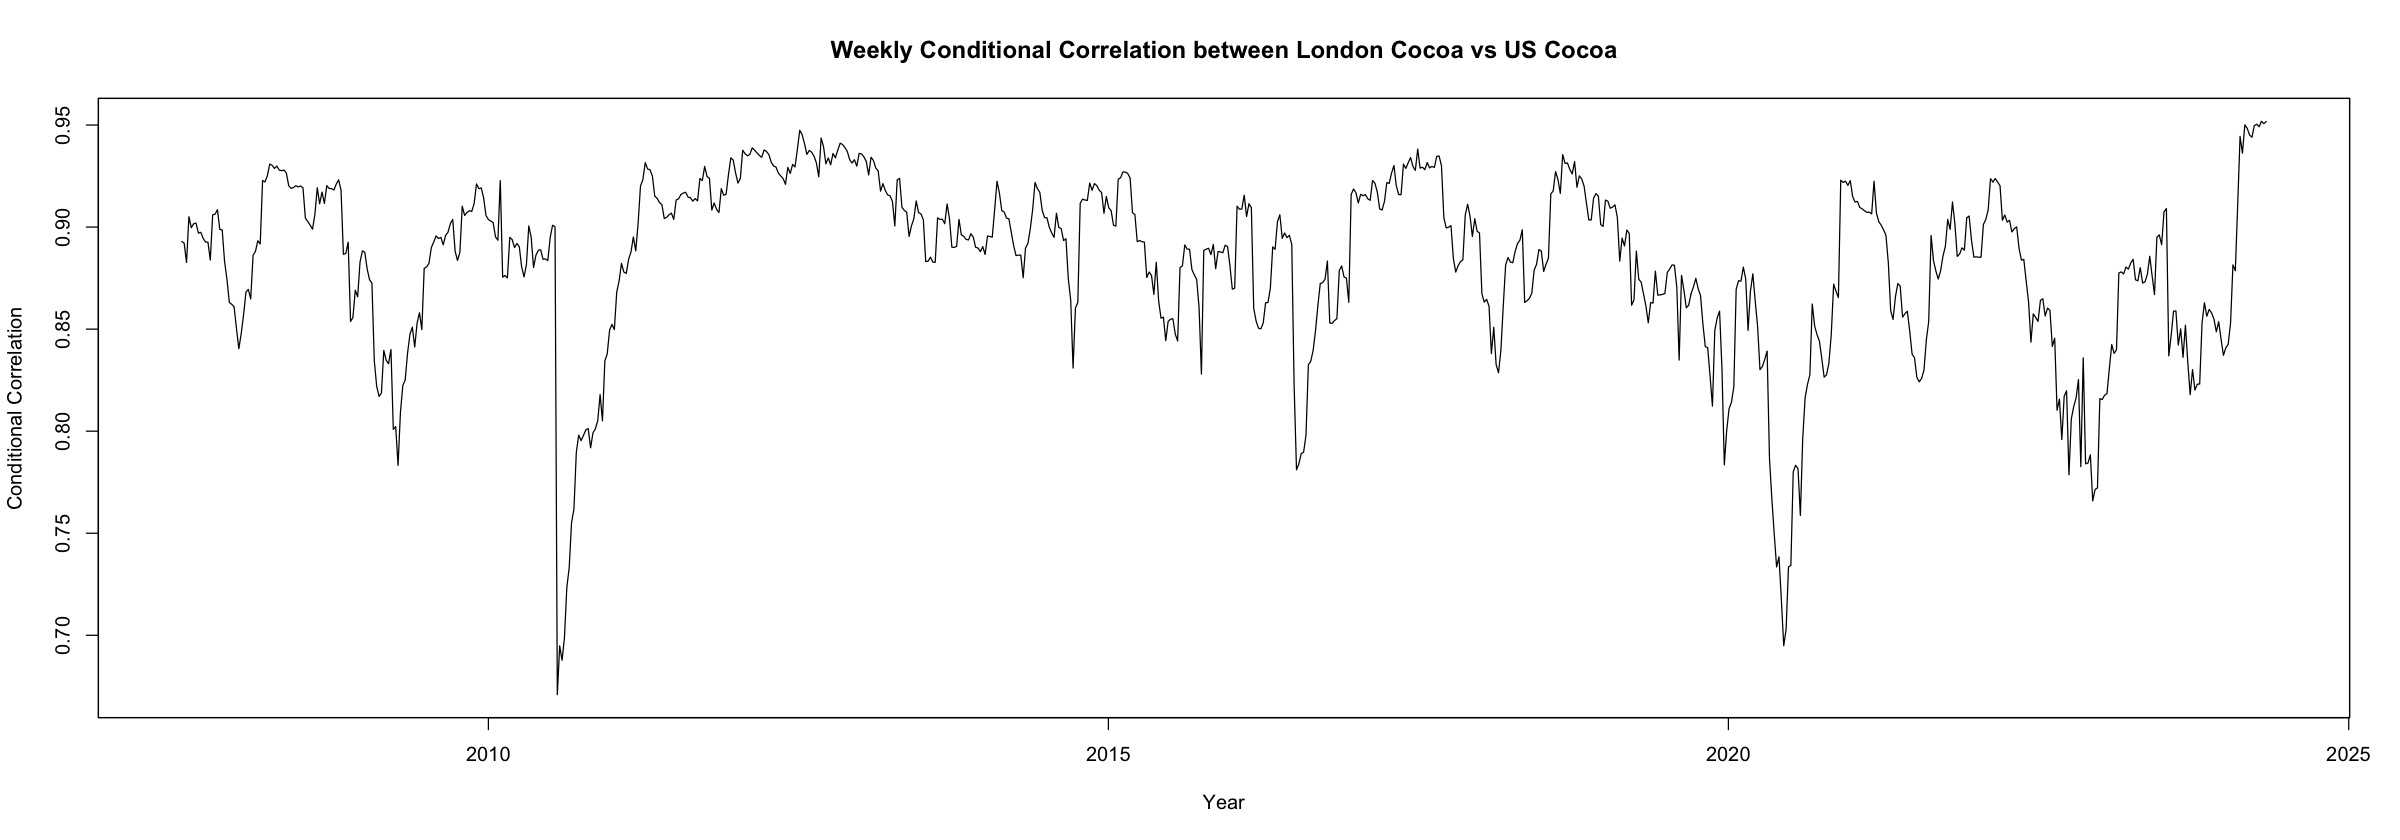

In [149]:
plot.zoo(cocoa_cor,type = "l",main = "Weekly Conditional Correlation between London Cocoa vs US Cocoa",xlab = "Year",ylab = "Conditional Correlation")

In [150]:
pdf("cor_cocoa_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cocoa_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

#### Where the notable minima and maxima of the conditional correlations?

In [151]:
tail(cocoa_cor)

                [,1]
2024-03-29 0.9497249
2024-04-05 0.9503980
2024-04-12 0.9491701
2024-04-19 0.9518025
2024-04-26 0.9506882
2024-05-03 0.9517258

In [152]:
which.max(cocoa_cor)
cocoa_cor[876,]

[1] 876

                [,1]
2024-04-19 0.9518025

In [153]:
cocoa_cor_first_half <- cocoa_cor["/2015"]
which.min(cocoa_cor_first_half)
cocoa_cor_first_half[159,]

[1] 159

                [,1]
2010-07-23 0.6709105

In [154]:
cocoa_cor_sec_half <- cocoa_cor["2016/"]
which.min(cocoa_cor_sec_half)
cocoa_cor_sec_half[233,]

[1] 233

                [,1]
2020-06-12 0.6948735

# US Cocoa - USD-denominated currency pairs VAR-DCC-GARCH model (Section 6.2.2)

### Data prep

In [155]:
us_w <- na.omit(merge(cr_w[,1],fr_w[,c(1,2,3,7)]))
str(us_w)
head(us_w)
tail(us_w)

An xts object on 2007-07-13 / 2024-05-03 containing: 
  Data:    double [878, 5]
  Columns: usc, eurusd, gbpusd, chfusd, ghsusd
  Index:   Date [878] (TZ: "UTC")
  xts Attributes:
    $ ret_type        : chr "log"
    $ coredata_content: chr "logReturn"


                   usc       eurusd       gbpusd       chfusd       ghsusd
2007-07-13 -0.02286903  0.011345725  0.011768041  0.012707420  0.004005436
2007-07-20  0.02522142  0.003150978  0.010561671  0.001682187  0.002202455
2007-07-27 -0.07969033 -0.014056529 -0.015439970 -0.006685362 -0.003802426
2007-08-03 -0.01849051  0.010216084  0.007480166  0.014875514 -0.002685547
2007-08-10 -0.03965627 -0.005898004 -0.007776587 -0.006690586 -0.004550623
2007-08-17 -0.04129406 -0.016011531 -0.021627054 -0.007943236  0.007384225

                     usc       eurusd       gbpusd        chfusd       ghsusd
2024-03-29  0.1057665488 -0.001111008  0.001744094 -0.0047696275 -0.015207144
2024-04-05  0.0006445376  0.003883141  0.001029173  0.0005411012 -0.007520957
2024-04-12  0.1176875748 -0.018063806 -0.014867051 -0.0138903731 -0.007463621
2024-04-19  0.0899585017  0.001173792 -0.006324418  0.0043785703  0.000000000
2024-04-26 -0.0786621644  0.003606646  0.009491706 -0.0043785703 -0.010349197
2024-05-03 -0.2628835611  0.006152718  0.004433357  0.0094627884 -0.010258321

### VAR

In [156]:
VARselect(us_w)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-4.097406e+01,-4.096245e+01,-4.094792e+01,-4.093465e+01,-4.091772e+01,-4.089626e+01,-4.086343e+01,-4.085207e+01,-4.085506e+01,-4.081913e+01
HQ(n),-4.091102e+01,-4.084688e+01,-4.077982e+01,-4.071402e+01,-4.064456e+01,-4.057057e+01,-4.048521e+01,-4.042132e+01,-4.037178e+01,-4.028331e+01
SC(n),-4.080933e+01,-4.066045e+01,-4.050864e+01,-4.035809e+01,-4.020389e+01,-4.004516e+01,-3.987505e+01,-3.972642e+01,-3.959213e+01,-3.941892e+01
FPE(n),1.603953e-18,1.622694e-18,1.646468e-18,1.668510e-18,1.697064e-18,1.733986e-18,1.792014e-18,1.812684e-18,1.807543e-18,1.874007e-18


In [157]:
us_var <- varxfit(us_w,p=1)
str(us_var)
us_var$Bcoef
t(us_var$pstat)

List of 10
 $ Bcoef     : num [1:5, 1:6] 0.05 -0.00818 0.01229 -0.01329 0.01198 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "usc" "eurusd" "gbpusd" "chfusd" ...
  .. ..$ : chr [1:6] "usc.l1" "eurusd.l1" "gbpusd.l1" "chfusd.l1" ...
 $ xfitted   : num [1:877, 1:5] -0.001249 0.002037 -0.002378 -0.001851 0.000891 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "usc" "eurusd" "gbpusd" "chfusd" ...
 $ xresiduals: num [1:877, 1:5] 0.0265 -0.0817 -0.0161 -0.0378 -0.0422 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:877] "2007-07-20" "2007-07-27" "2007-08-03" "2007-08-10" ...
  .. ..$ : chr [1:5] "usc" "eurusd" "gbpusd" "chfusd" ...
 $ Bcov      :List of 5
  ..$ usc   : num [1:6, 1:6] 1.33e-03 -9.28e-04 -5.62e-04 8.91e-05 -2.04e-05 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:6] "usc.l1" "eurusd.l1" "gbpusd.l1" "chfusd.l1" ...
  .. .. ..$ : NULL
  ..$ eurusd: num [1:6, 1:6] 1.39e-04 -9.68e-05 -5.86e-05 9.30e-06 -2.13e-

,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,const
usc,0.050001396,0.30612280,-0.15377774,-0.30238132,0.071715083,0.0017866584
eurusd,-0.008176897,0.10576647,0.01209512,-0.14268570,-0.002284233,-0.0001918788
gbpusd,0.012289331,0.09749489,-0.05227576,-0.09786695,-0.024854829,-0.0006189388
chfusd,-0.013293433,0.20381482,-0.01425397,-0.17069365,0.005808930,0.0004699575
ghsusd,0.011976600,-0.04817206,0.05194375,0.04116860,0.074579294,-0.0028628306


,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,const
usc,0.1711268,0.0636196264,0.2136275,0.0159139313,0.21855587,0.1832858443
eurusd,0.4884067,0.0472701053,0.7620339,0.0004287220,0.90343944,0.6581937277
gbpusd,0.3294309,0.0867597449,0.2202879,0.0236763904,0.21633089,0.1813659602
chfusd,0.3308123,0.0009646809,0.7580059,0.0002754154,0.78995909,0.3495235111
ghsusd,0.5717085,0.6145791605,0.4686195,0.5712107542,0.02728589,0.0002346016


## US Cocoa normal model

In [158]:
ugarch_spec_us_n <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "norm")
spec_dcc_us_n <- dccspec(uspec = multispec(replicate(ugarch_spec_us_n,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvnorm"))
dcc_fit_us_n <- dccfit(data = us_w,spec = spec_dcc_us_n)
dcc_fit_us_n


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  57
[VAR GARCH DCC UncQ] : [30+15+2+10]
No. Series           :  5
No. Obs.             :  878
Log-Likelihood       :  12679.13
Av.Log-Likelihood    :  14.44 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error  t value Pr(>|t|)
[usc].omega      0.000043    0.000025  1.75104 0.079939
[usc].alpha1     0.115961    0.039021  2.97176 0.002961
[usc].beta1      0.862379    0.043531 19.81084 0.000000
[eurusd].omega   0.000003    0.000002  1.26797 0.204809
[eurusd].alpha1  0.091497    0.026109  3.50444 0.000458
[eurusd].beta1   0.891189    0.028200 31.60277 0.000000
[gbpusd].omega   0.000006    0.000009  0.61742 0.536957
[gbpusd].alpha1  0.108100    0.023669  4.56719 0.000005
[gbpusd].beta1   0.861082    0.039309 21.90573 0.000000
[chfusd].omega   0.000015    

In [159]:
dcc_us_norm <- round(dcc_fit_us_n@mfit$matcoef,4)
dcc_us_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,1.7510,0.0799
[usc].alpha1,0.1160,0.0390,2.9718,0.0030
[usc].beta1,0.8624,0.0435,19.8108,0.0000
[eurusd].omega,0.0000,0.0000,1.2680,0.2048
[eurusd].alpha1,0.0915,0.0261,3.5044,0.0005
[eurusd].beta1,0.8912,0.0282,31.6028,0.0000
[gbpusd].omega,0.0000,0.0000,0.6174,0.5370
[gbpusd].alpha1,0.1081,0.0237,4.5672,0.0000
[gbpusd].beta1,0.8611,0.0393,21.9057,0.0000
[chfusd].omega,0.0000,0.0000,0.6953,0.4869


In [160]:
dcc_us_n <- rep(NA,17)
for(i in 1:17){
    dcc_us_n[i] = paste0(round(dcc_us_norm[i,1],4)," (",round(dcc_us_norm[i,2],4),")")
}
dcc_us_n

[1] "0 (0)"           "0.116 (0.039)"   "0.8624 (0.0435)" "0 (0)"          
 [5] "0.0915 (0.0261)" "0.8912 (0.0282)" "0 (0)"           "0.1081 (0.0237)"
 [9] "0.8611 (0.0393)" "0 (0)"           "0.2192 (0.0523)" "0.7511 (0.1369)"
[13] "0 (0)"           "0.5649 (0.1206)" "0.4341 (0.1069)" "0.0101 (0.0201)"
[17] "0.7406 (0.0975)"

## DCC t-model for US Cocoa

In [161]:
ugarch_spec_us_t <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "std")
spec_dcc_us_t <- dccspec(uspec = multispec(replicate(ugarch_spec_us_t,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvt"))
dcc_fit_us_t <- dccfit(data = us_w,spec = spec_dcc_us_t)
dcc_fit_us_t


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvt
Model                :  DCC(1,1)
No. Parameters       :  63
[VAR GARCH DCC UncQ] : [30+20+3+10]
No. Series           :  5
No. Obs.             :  878
Log-Likelihood       :  12938.73
Av.Log-Likelihood    :  14.74 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error  t value Pr(>|t|)
[usc].omega      0.000025    0.000017  1.49232 0.135616
[usc].alpha1     0.089479    0.025944  3.44889 0.000563
[usc].beta1      0.899121    0.029626 30.34885 0.000000
[usc].shape     11.169865    4.211044  2.65252 0.007989
[eurusd].omega   0.000003    0.000003  1.14274 0.253149
[eurusd].alpha1  0.087779    0.028157  3.11748 0.001824
[eurusd].beta1   0.893848    0.031122 28.72087 0.000000
[eurusd].shape  15.518004    7.024805  2.20903 0.027173
[gbpusd].omega   0.000006    0.000007  0.89751 0.369448
[gbpusd].alpha1  0.105073    0.0

In [162]:
dcc_us_t <- round(dcc_fit_us_t@mfit$matcoef,4)
dcc_us_t
dcc_us_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,1.4923,0.1356
[usc].alpha1,0.0895,0.0259,3.4489,0.0006
[usc].beta1,0.8991,0.0296,30.3489,0.0000
[usc].shape,11.1699,4.2110,2.6525,0.0080
[eurusd].omega,0.0000,0.0000,1.1427,0.2531
[eurusd].alpha1,0.0878,0.0282,3.1175,0.0018
[eurusd].beta1,0.8938,0.0311,28.7209,0.0000
[eurusd].shape,15.5180,7.0248,2.2090,0.0272
[gbpusd].omega,0.0000,0.0000,0.8975,0.3694
[gbpusd].alpha1,0.1051,0.0271,3.8766,0.0001


,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,1.7510,0.0799
[usc].alpha1,0.1160,0.0390,2.9718,0.0030
[usc].beta1,0.8624,0.0435,19.8108,0.0000
[eurusd].omega,0.0000,0.0000,1.2680,0.2048
[eurusd].alpha1,0.0915,0.0261,3.5044,0.0005
[eurusd].beta1,0.8912,0.0282,31.6028,0.0000
[gbpusd].omega,0.0000,0.0000,0.6174,0.5370
[gbpusd].alpha1,0.1081,0.0237,4.5672,0.0000
[gbpusd].beta1,0.8611,0.0393,21.9057,0.0000
[chfusd].omega,0.0000,0.0000,0.6953,0.4869


In [163]:
dcc_us_n

[1] "0 (0)"           "0.116 (0.039)"   "0.8624 (0.0435)" "0 (0)"          
 [5] "0.0915 (0.0261)" "0.8912 (0.0282)" "0 (0)"           "0.1081 (0.0237)"
 [9] "0.8611 (0.0393)" "0 (0)"           "0.2192 (0.0523)" "0.7511 (0.1369)"
[13] "0 (0)"           "0.5649 (0.1206)" "0.4341 (0.1069)" "0.0101 (0.0201)"
[17] "0.7406 (0.0975)"

In [164]:
dcc_us_std <- rep(NA,23)
for(i in 1:23){
    dcc_us_std[i] = paste0(round(dcc_us_t[i,1],4)," (",round(dcc_us_t[i,2],4),")")
}
dcc_us_std
params_us <- rownames(dcc_us_t)
params_us

[1] "0 (0)"           "0.0895 (0.0259)" "0.8991 (0.0296)" "11.1699 (4.211)"
 [5] "0 (0)"           "0.0878 (0.0282)" "0.8938 (0.0311)" "15.518 (7.0248)"
 [9] "0 (0)"           "0.1051 (0.0271)" "0.8589 (0.0266)" "13.9744 (5.226)"
[13] "0 (0)"           "0.0998 (0.0154)" "0.8493 (0.0172)" "6.9332 (1.7613)"
[17] "0 (0)"           "0.5623 (0.1793)" "0.4367 (0.2085)" "3.2995 (0.2615)"
[21] "0.0368 (0.0066)" "0.9251 (0.0231)" "8.2072 (0.9724)"

[1] "[usc].omega"     "[usc].alpha1"    "[usc].beta1"     "[usc].shape"    
 [5] "[eurusd].omega"  "[eurusd].alpha1" "[eurusd].beta1"  "[eurusd].shape" 
 [9] "[gbpusd].omega"  "[gbpusd].alpha1" "[gbpusd].beta1"  "[gbpusd].shape" 
[13] "[chfusd].omega"  "[chfusd].alpha1" "[chfusd].beta1"  "[chfusd].shape" 
[17] "[ghsusd].omega"  "[ghsusd].alpha1" "[ghsusd].beta1"  "[ghsusd].shape" 
[21] "[Joint]dcca1"    "[Joint]dccb1"    "[Joint]mshape"

In [165]:
infocriteria(dcc_fit_us_t)
likelihood(dcc_fit_us_t)

,
Akaike,-29.32968
Bayes,-28.98686
Shibata,-29.33909
Hannan-Quinn,-29.19857


[1] 12938.73

## Table summarizing estimates for US-Cocoa and USD-denominated currency pairs (Table 6.4 - Weekly)

In [166]:
dcc_us_summary <- data.frame("Parameters" = c(params_us,"AIC","BIC","LogLik"),"DCC(norm)"=c(dcc_us_n[1:3],NA,dcc_us_n[4:6],NA,dcc_us_n[7:9],NA,dcc_us_n[10:12],NA,
                            dcc_us_n[13:15],NA,dcc_us_n[16:17],NA,round(infocriteria(dcc_fit_us_n)[1],4),round(infocriteria(dcc_fit_us_n)[2],4),round(likelihood(dcc_fit_us_n),4)),
                             "DCC(t)" = c(dcc_us_std,round(infocriteria(dcc_fit_us_t)[1],4),round(infocriteria(dcc_fit_us_t)[2],4),round(likelihood(dcc_fit_us_t),4)))
dcc_us_summary

Parameters,DCC.norm.,DCC.t.
<chr>,<chr>,<chr>
[usc].omega,0 (0),0 (0)
[usc].alpha1,0.116 (0.039),0.0895 (0.0259)
[usc].beta1,0.8624 (0.0435),0.8991 (0.0296)
[usc].shape,NA,11.1699 (4.211)
[eurusd].omega,0 (0),0 (0)
[eurusd].alpha1,0.0915 (0.0261),0.0878 (0.0282)
[eurusd].beta1,0.8912 (0.0282),0.8938 (0.0311)
[eurusd].shape,NA,15.518 (7.0248)
[gbpusd].omega,0 (0),0 (0)


### Plots for weekly correlations for US Cocoa - USD-denom. currency pairs model (Figure A.8)

In [167]:
us_cor <- rcor(dcc_fit_us_t)
us_eur_cor <- xts(us_cor[2,1,],order.by = index(us_w))
us_gbp_cor <- xts(us_cor[3,1,],order.by = index(us_w))
us_chf_cor <- xts(us_cor[4,1,],order.by = index(us_w))
us_ghs_cor <- xts(us_cor[5,1,],order.by = index(us_w))

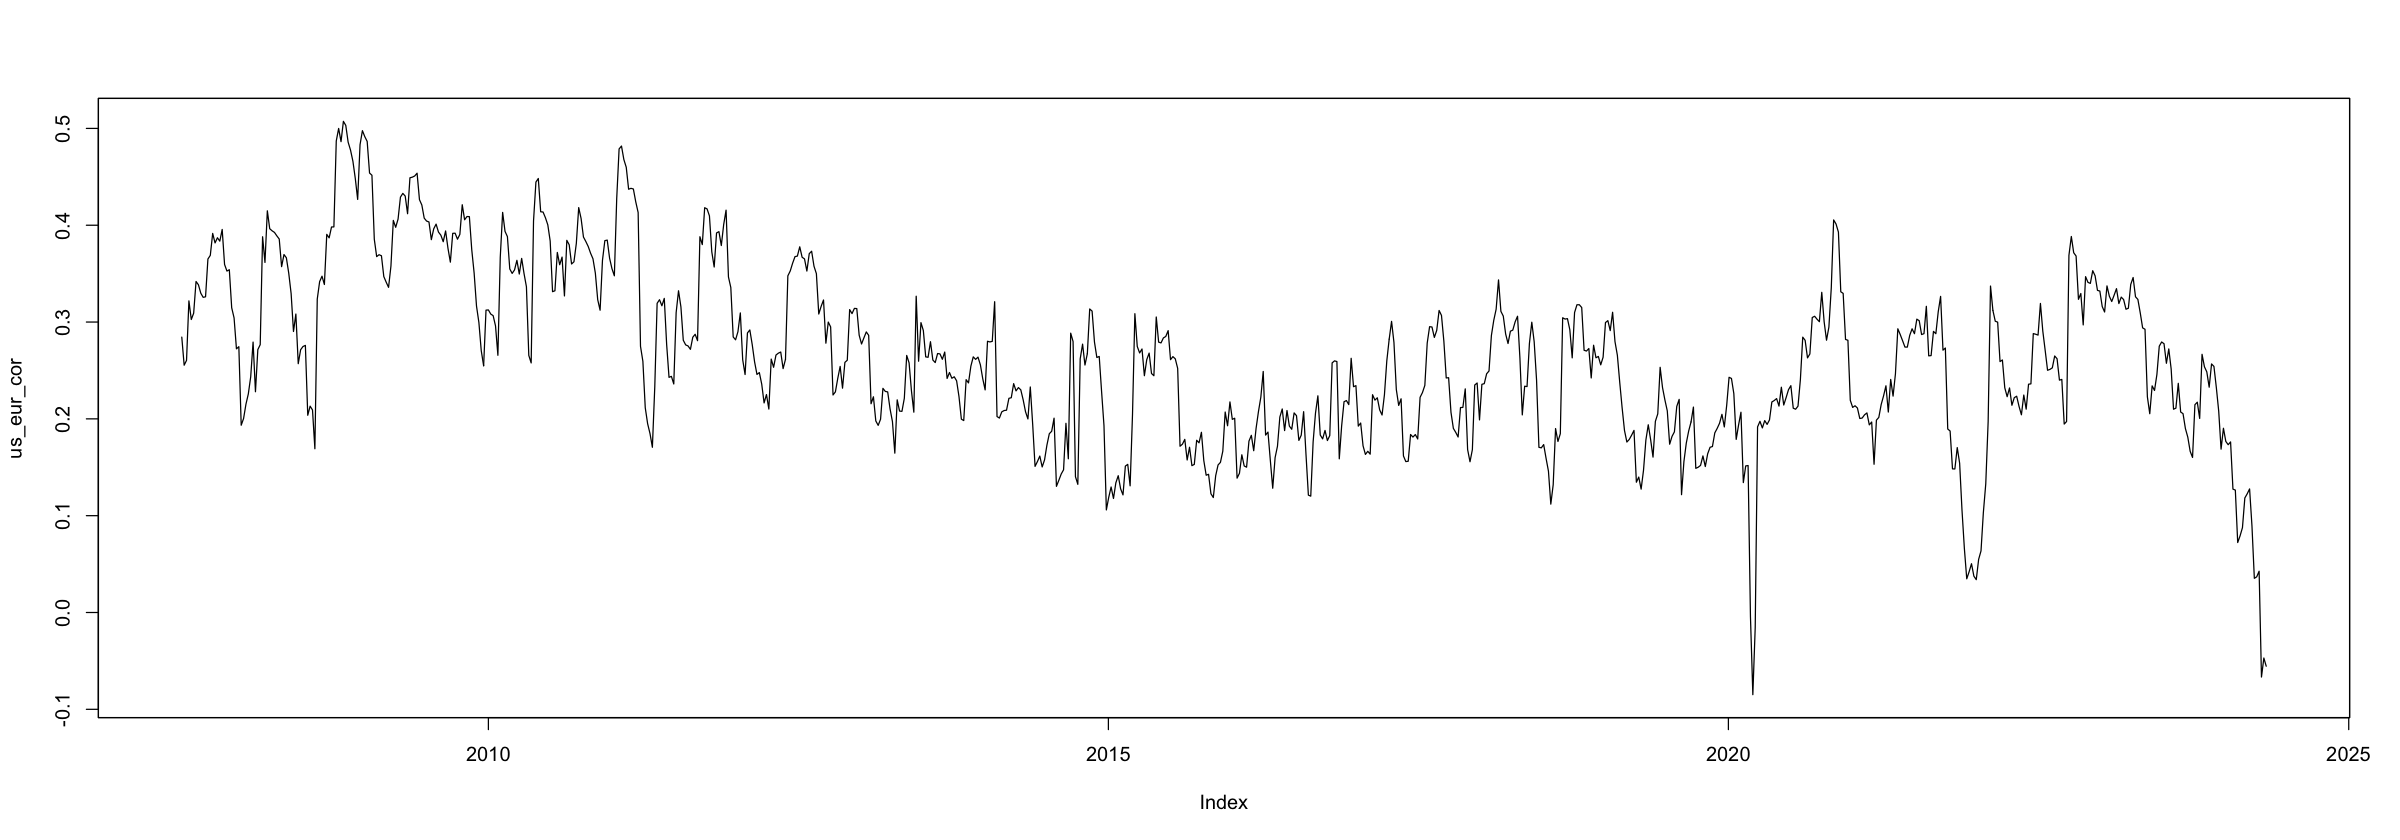

In [168]:
plot.zoo(us_eur_cor)

In [169]:
pdf("us_eur_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_eur_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

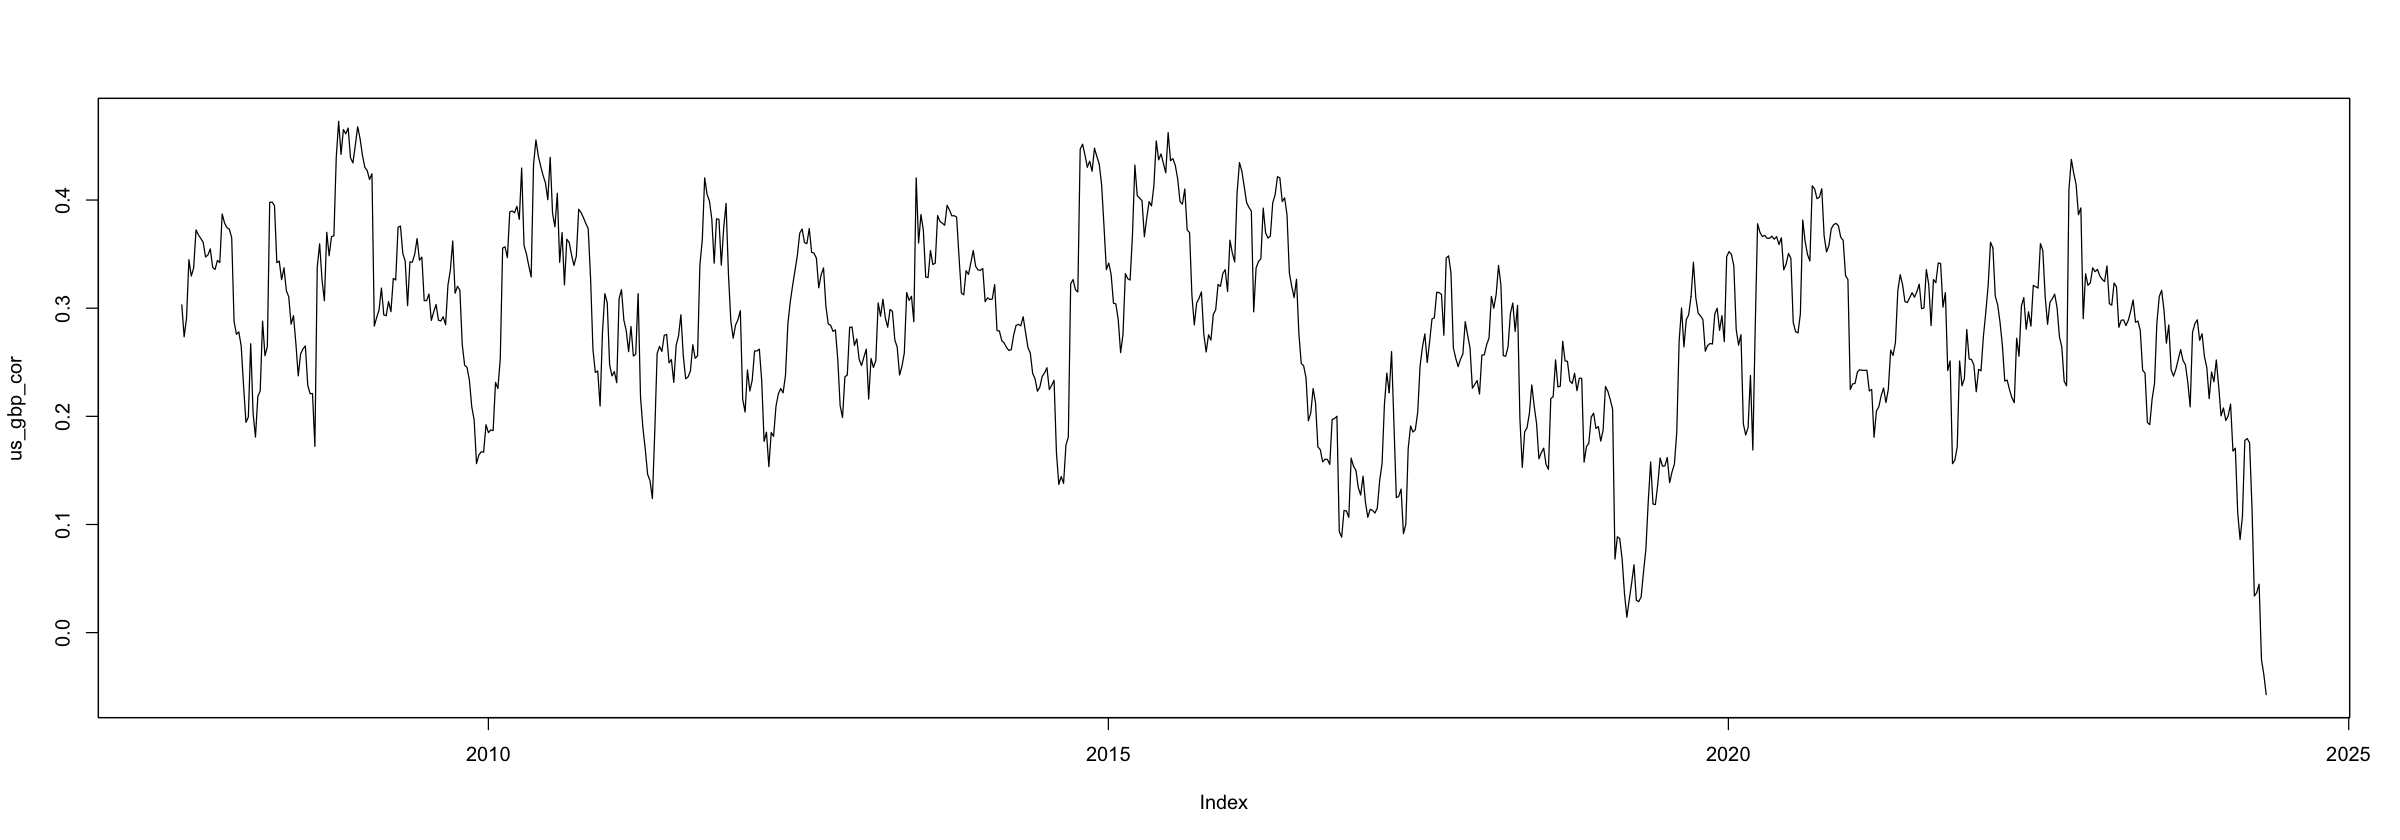

In [170]:
plot.zoo(us_gbp_cor)

In [171]:
pdf("us_gbp_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_gbp_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

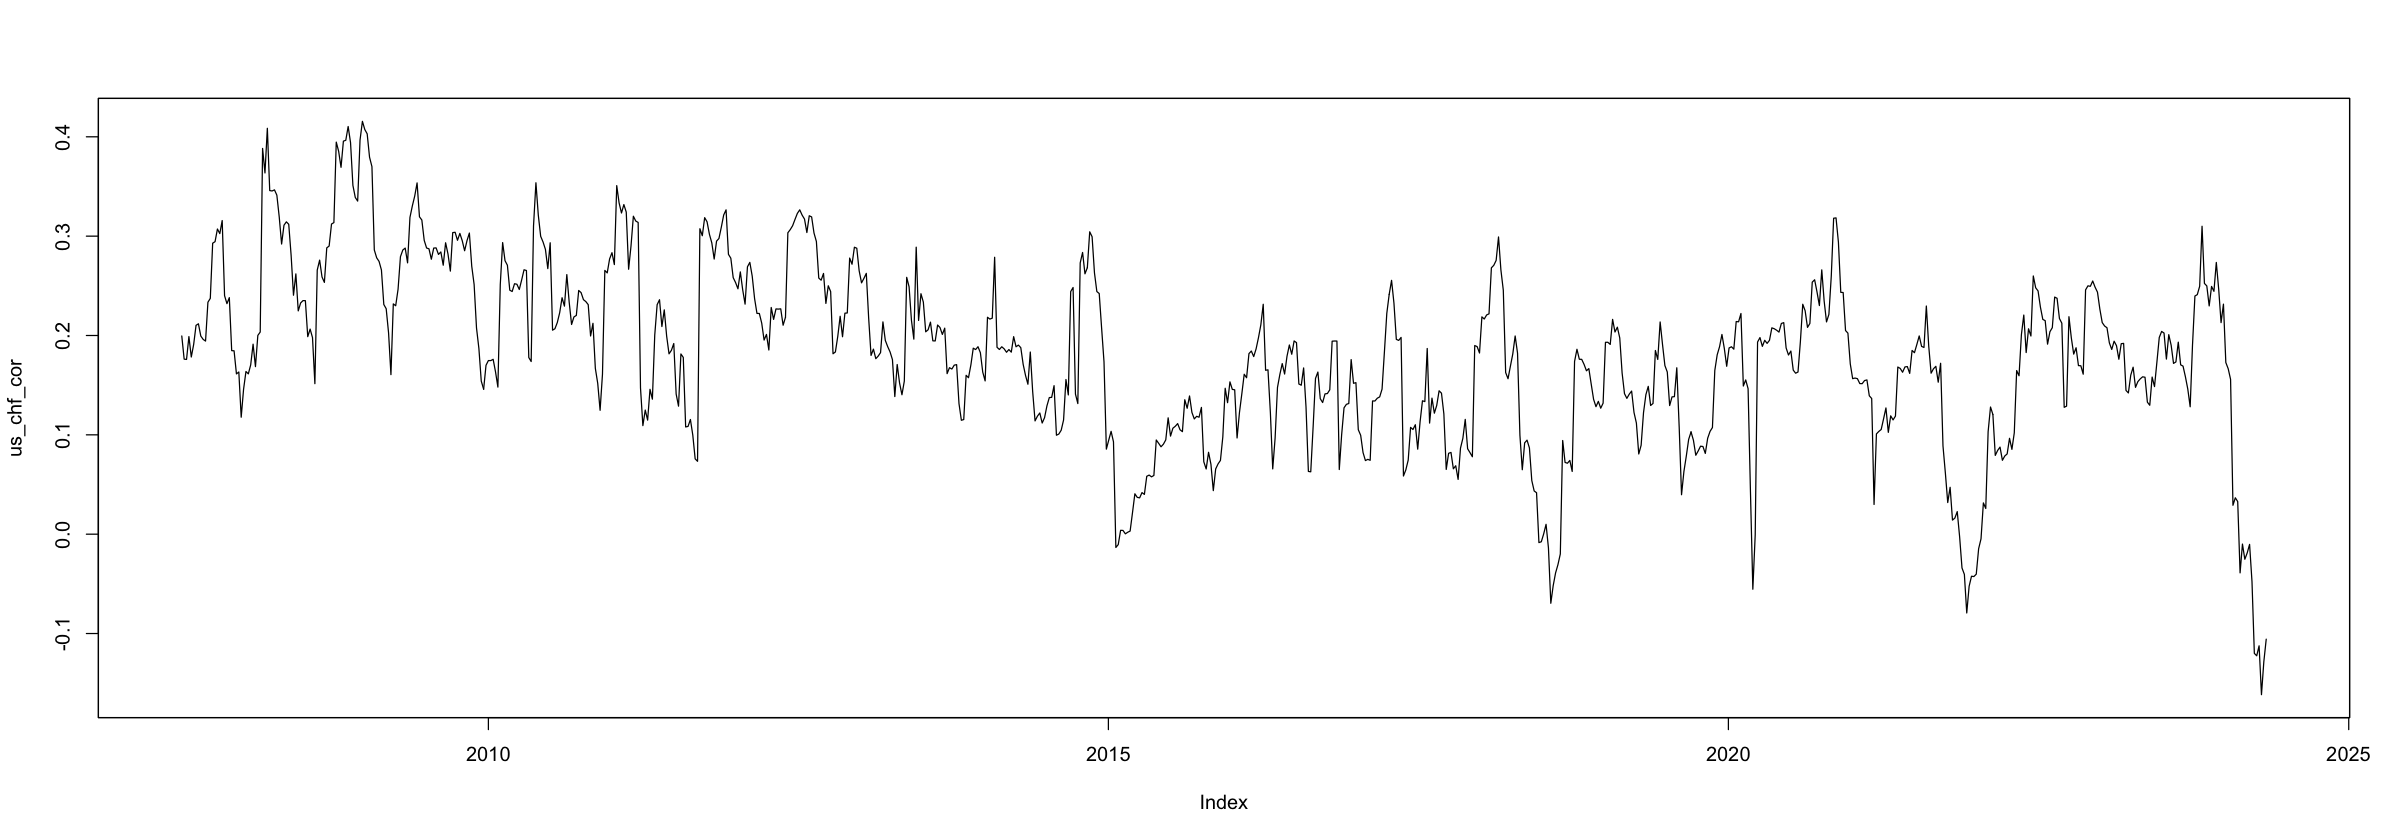

In [172]:
plot.zoo(us_chf_cor)

In [173]:
pdf("us_chf_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_chf_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

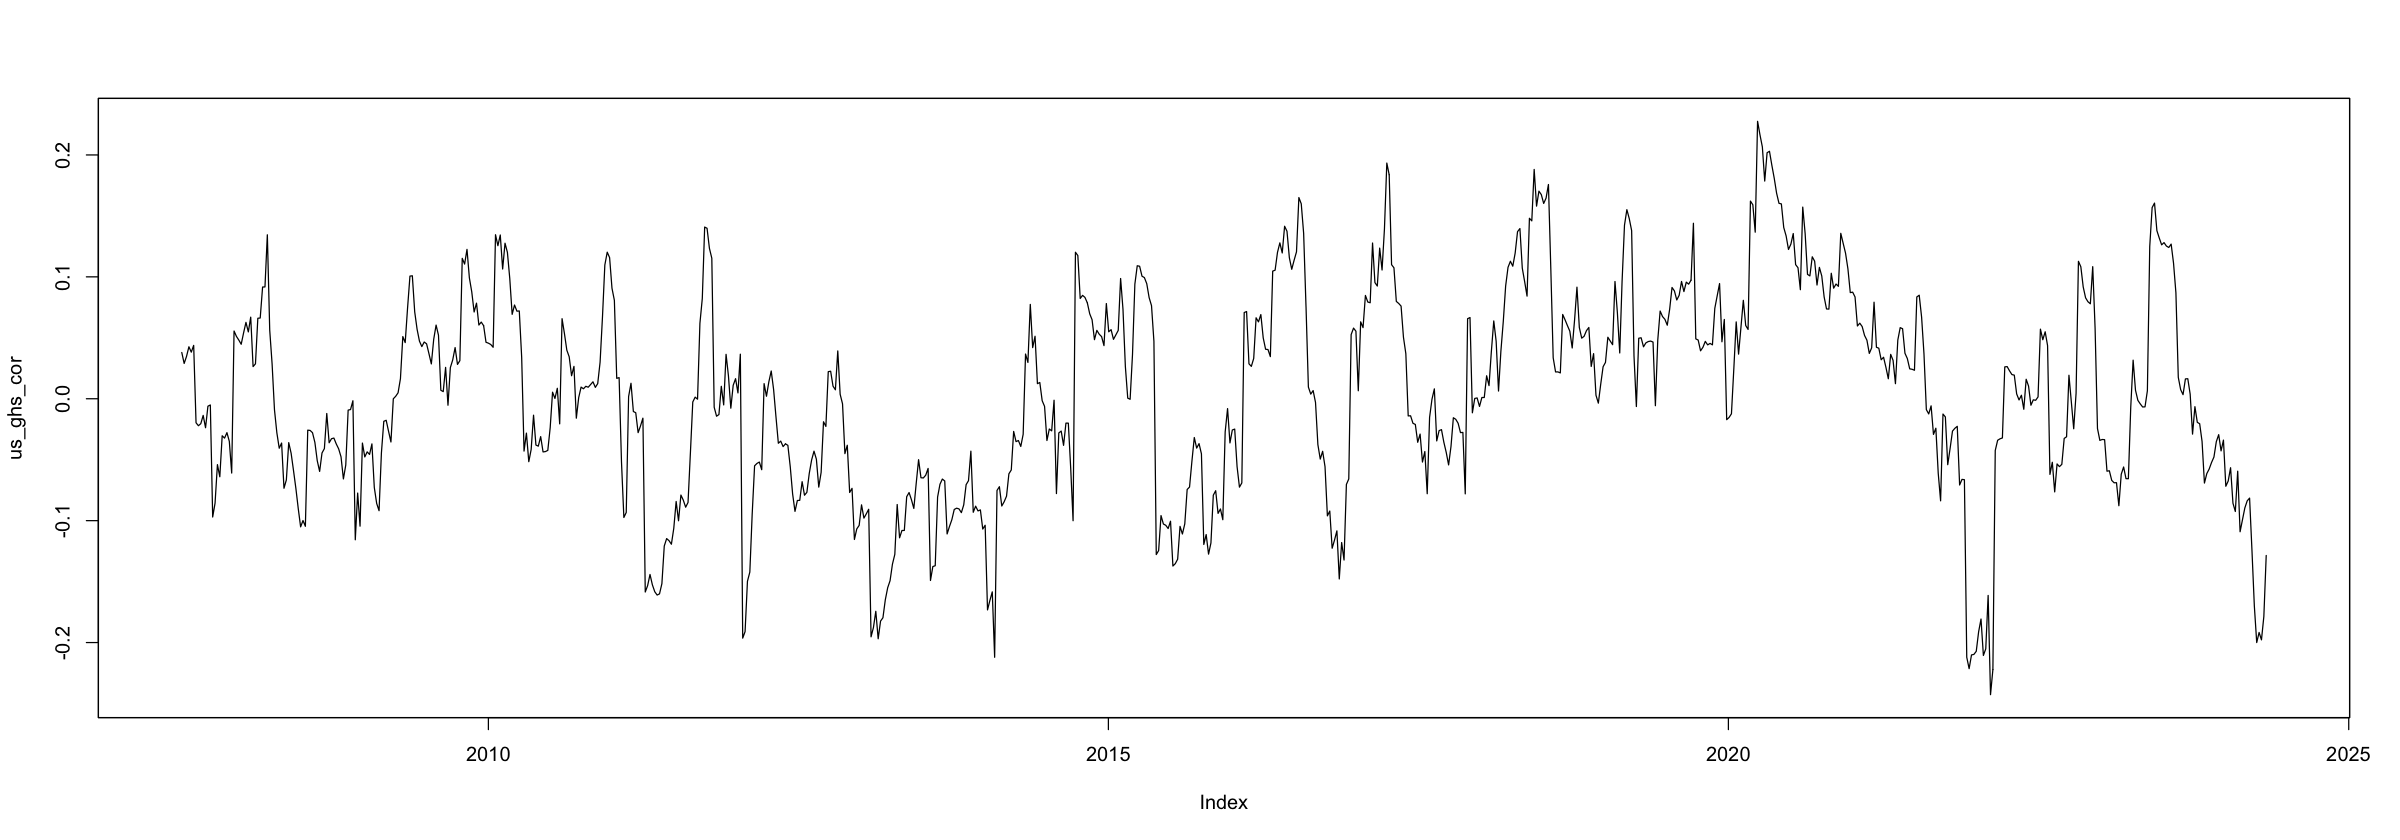

In [174]:
plot.zoo(us_ghs_cor)

In [175]:
pdf("us_ghs_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_ghs_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# London Cocoa - GBP-denominated currency pairs VAR-DCC model (Section 6.2.3)

### Data prep

In [176]:
l_w <- na.omit(merge(cr_w[,2],fr_w[,c(4,5,6,8)]))

### VAR

In [177]:
VARselect(l_w)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-4.112028e+01,-4.110647e+01,-4.108885e+01,-4.107366e+01,-4.105373e+01,-4.103118e+01,-4.099995e+01,-4.098613e+01,-4.098914e+01,-4.095522e+01
HQ(n),-4.105725e+01,-4.099090e+01,-4.092075e+01,-4.085303e+01,-4.078057e+01,-4.070549e+01,-4.062173e+01,-4.055538e+01,-4.050586e+01,-4.041940e+01
SC(n),-4.095555e+01,-4.080446e+01,-4.064957e+01,-4.049710e+01,-4.033990e+01,-4.018008e+01,-4.001157e+01,-3.986048e+01,-3.972621e+01,-3.955501e+01
FPE(n),1.385760e-18,1.405045e-18,1.430040e-18,1.451970e-18,1.481259e-18,1.515128e-18,1.563325e-18,1.585262e-18,1.580728e-18,1.635572e-18


In [178]:
l_var <- varxfit(l_w,p=1)
l_var$Bcoef
t(l_var$pstat)

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,const
lc,0.083127256,0.02540185,0.11659765,-0.17094355,0.08525104,0.0022119329
usdgbp,-0.015209669,-0.06734051,-0.08692464,0.09013655,0.02404885,0.0006285895
eurgbp,-0.019884400,-0.02965836,0.01407126,-0.04835976,0.02262786,0.0004276019
chfgbp,-0.021365788,-0.07568256,0.11109289,-0.07887719,0.02964781,0.0010792931
ghsgbp,-0.007357829,-0.19886410,-0.12683115,0.12832238,0.09883228,-0.0022233848


,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,const
lc,0.01835334,0.82790029,0.4276188,0.12619918,0.10158570,0.06520747
usdgbp,0.26400517,0.13575333,0.1258147,0.03686406,0.23189379,0.17499535
eurgbp,0.09037314,0.44610583,0.7738272,0.19406318,0.19207904,0.28463616
chfgbp,0.15355416,0.12728807,0.0751731,0.09666164,0.18009517,0.03416713
ghsgbp,0.78626481,0.02705035,0.2623323,0.13590681,0.01368091,0.01606110


## Normal London Model

In [179]:
ugarch_spec_l_n <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "norm")
spec_dcc_l_n <- dccspec(uspec = multispec(replicate(ugarch_spec_l_n,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvnorm"))
dcc_fit_l_n <- dccfit(data = l_w,spec = spec_dcc_l_n)
dcc_fit_l_n


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  57
[VAR GARCH DCC UncQ] : [30+15+2+10]
No. Series           :  5
No. Obs.             :  878
Log-Likelihood       :  12555.25
Av.Log-Likelihood    :  14.3 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error  t value Pr(>|t|)
[lc].omega       0.000022    0.000013  1.69628 0.089833
[lc].alpha1      0.111744    0.027969  3.99536 0.000065
[lc].beta1       0.876868    0.029436 29.78849 0.000000
[usdgbp].omega   0.000005    0.000011  0.48115 0.630410
[usdgbp].alpha1  0.108652    0.027695  3.92322 0.000087
[usdgbp].beta1   0.861175    0.047361 18.18305 0.000000
[eurgbp].omega   0.000003    0.000004  0.66229 0.507788
[eurgbp].alpha1  0.100693    0.047550  2.11761 0.034208
[eurgbp].beta1   0.881550    0.054739 16.10467 0.000000
[chfgbp].omega   0.000033    0

In [180]:
dcc_l_norm <- round(dcc_fit_l_n@mfit$matcoef,4)
dcc_l_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[lc].omega,0.0000,0.0000,1.6963,0.0898
[lc].alpha1,0.1117,0.0280,3.9954,0.0001
[lc].beta1,0.8769,0.0294,29.7885,0.0000
[usdgbp].omega,0.0000,0.0000,0.4811,0.6304
[usdgbp].alpha1,0.1087,0.0277,3.9232,0.0001
[usdgbp].beta1,0.8612,0.0474,18.1830,0.0000
[eurgbp].omega,0.0000,0.0000,0.6623,0.5078
[eurgbp].alpha1,0.1007,0.0476,2.1176,0.0342
[eurgbp].beta1,0.8816,0.0547,16.1047,0.0000
[chfgbp].omega,0.0000,0.0000,2.6172,0.0089


In [181]:
dcc_l_n <- rep(NA,17)
for(i in 1:17){
    dcc_l_n[i] = paste0(round(dcc_l_norm[i,1],4)," (",round(dcc_l_norm[i,2],4),")")
}
dcc_l_n

[1] "0 (0)"           "0.1117 (0.028)"  "0.8769 (0.0294)" "0 (0)"          
 [5] "0.1087 (0.0277)" "0.8612 (0.0474)" "0 (0)"           "0.1007 (0.0476)"
 [9] "0.8816 (0.0547)" "0 (0)"           "0.0869 (0.0734)" "0.7648 (0.0406)"
[13] "0 (0)"           "0.385 (0.1642)"  "0.614 (0.1421)"  "0.0606 (0.0999)"
[17] "0.7992 (0.5292)"

## DCC t-model for London Cocoa

In [182]:
ugarch_spec_l_t <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "std")
spec_dcc_l_t <- dccspec(uspec = multispec(replicate(ugarch_spec_l_t,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvt"))
dcc_fit_l_t <- dccfit(data = l_w,spec = spec_dcc_l_t)
dcc_fit_l_t


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvt
Model                :  DCC(1,1)
No. Parameters       :  63
[VAR GARCH DCC UncQ] : [30+20+3+10]
No. Series           :  5
No. Obs.             :  878
Log-Likelihood       :  12941.15
Av.Log-Likelihood    :  14.74 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error   t value Pr(>|t|)
[lc].omega       0.000016    0.000012   1.28594 0.198466
[lc].alpha1      0.097530    0.023280   4.18942 0.000028
[lc].beta1       0.895460    0.016873  53.07102 0.000000
[lc].shape      12.873347    4.737036   2.71760 0.006576
[usdgbp].omega   0.000006    0.000008   0.77956 0.435649
[usdgbp].alpha1  0.105686    0.029570   3.57405 0.000352
[usdgbp].beta1   0.858786    0.029091  29.52108 0.000000
[usdgbp].shape  14.467070    5.609069   2.57923 0.009902
[eurgbp].omega   0.000004    0.000004   0.90046 0.367875
[eurgbp].alpha1  0.107

### Comparison of Weekly London - Forex models with t-errors vs normal errors

In [183]:
dcc_l_t <- round(dcc_fit_l_t@mfit$matcoef,4)
dcc_l_t
dcc_l_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[lc].omega,0.0000,0.0000,1.2859,0.1985
[lc].alpha1,0.0975,0.0233,4.1894,0.0000
[lc].beta1,0.8955,0.0169,53.0710,0.0000
[lc].shape,12.8733,4.7370,2.7176,0.0066
[usdgbp].omega,0.0000,0.0000,0.7796,0.4356
[usdgbp].alpha1,0.1057,0.0296,3.5740,0.0004
[usdgbp].beta1,0.8588,0.0291,29.5211,0.0000
[usdgbp].shape,14.4671,5.6091,2.5792,0.0099
[eurgbp].omega,0.0000,0.0000,0.9005,0.3679
[eurgbp].alpha1,0.1073,0.0331,3.2367,0.0012


,Estimate,Std. Error,t value,Pr(>|t|)
[lc].omega,0.0000,0.0000,1.6963,0.0898
[lc].alpha1,0.1117,0.0280,3.9954,0.0001
[lc].beta1,0.8769,0.0294,29.7885,0.0000
[usdgbp].omega,0.0000,0.0000,0.4811,0.6304
[usdgbp].alpha1,0.1087,0.0277,3.9232,0.0001
[usdgbp].beta1,0.8612,0.0474,18.1830,0.0000
[eurgbp].omega,0.0000,0.0000,0.6623,0.5078
[eurgbp].alpha1,0.1007,0.0476,2.1176,0.0342
[eurgbp].beta1,0.8816,0.0547,16.1047,0.0000
[chfgbp].omega,0.0000,0.0000,2.6172,0.0089


In [184]:
dcc_l_n

[1] "0 (0)"           "0.1117 (0.028)"  "0.8769 (0.0294)" "0 (0)"          
 [5] "0.1087 (0.0277)" "0.8612 (0.0474)" "0 (0)"           "0.1007 (0.0476)"
 [9] "0.8816 (0.0547)" "0 (0)"           "0.0869 (0.0734)" "0.7648 (0.0406)"
[13] "0 (0)"           "0.385 (0.1642)"  "0.614 (0.1421)"  "0.0606 (0.0999)"
[17] "0.7992 (0.5292)"

In [185]:
dcc_l_std <- rep(NA,23)
for(i in 1:23){
    dcc_l_std[i] = paste0(round(dcc_l_t[i,1],4)," (",round(dcc_l_t[i,2],4),")")
}
dcc_l_std
params_l<- rownames(dcc_l_t)
params_l

[1] "0 (0)"            "0.0975 (0.0233)"  "0.8955 (0.0169)"  "12.8733 (4.737)" 
 [5] "0 (0)"            "0.1057 (0.0296)"  "0.8588 (0.0291)"  "14.4671 (5.6091)"
 [9] "0 (0)"            "0.1073 (0.0331)"  "0.8661 (0.0453)"  "12.0553 (4.0643)"
[13] "0 (0)"            "0.1267 (0.046)"   "0.7931 (0.0389)"  "6.207 (1.6038)"  
[17] "0 (0)"            "0.2506 (0.0685)"  "0.6846 (0.0684)"  "4.9974 (0.8361)" 
[21] "0.0574 (0.0058)"  "0.9248 (0.0089)"  "7.4285 (0.8094)"

[1] "[lc].omega"      "[lc].alpha1"     "[lc].beta1"      "[lc].shape"     
 [5] "[usdgbp].omega"  "[usdgbp].alpha1" "[usdgbp].beta1"  "[usdgbp].shape" 
 [9] "[eurgbp].omega"  "[eurgbp].alpha1" "[eurgbp].beta1"  "[eurgbp].shape" 
[13] "[chfgbp].omega"  "[chfgbp].alpha1" "[chfgbp].beta1"  "[chfgbp].shape" 
[17] "[ghsgbp].omega"  "[ghsgbp].alpha1" "[ghsgbp].beta1"  "[ghsgbp].shape" 
[21] "[Joint]dcca1"    "[Joint]dccb1"    "[Joint]mshape"

In [186]:
infocriteria(dcc_fit_l_t)
likelihood(dcc_fit_l_t)

,
Akaike,-29.33520
Bayes,-28.99239
Shibata,-29.34461
Hannan-Quinn,-29.20409


[1] 12941.15

## Table summarizing estimates for London Cocoa - GBP-denominated currency pairs VAR-DCC model (Table 6.5 - Weekly)

In [187]:
dcc_l_summary <- data.frame("Parameters" = c(params_l,"AIC","BIC","LogLik"),"DCC(norm)"=c(dcc_l_n[1:3],NA,dcc_l_n[4:6],NA,dcc_l_n[7:9],NA,dcc_l_n[10:12],NA,
                            dcc_l_n[13:15],NA,dcc_l_n[16:17],NA,round(infocriteria(dcc_fit_l_n)[1],4),round(infocriteria(dcc_fit_l_n)[2],4),round(likelihood(dcc_fit_l_n),4)),
                             "DCC(t)" = c(dcc_l_std,round(infocriteria(dcc_fit_l_t)[1],4),round(infocriteria(dcc_fit_l_t)[2],4),round(likelihood(dcc_fit_l_t),4)))
dcc_l_summary

Parameters,DCC.norm.,DCC.t.
<chr>,<chr>,<chr>
[lc].omega,0 (0),0 (0)
[lc].alpha1,0.1117 (0.028),0.0975 (0.0233)
[lc].beta1,0.8769 (0.0294),0.8955 (0.0169)
[lc].shape,NA,12.8733 (4.737)
[usdgbp].omega,0 (0),0 (0)
[usdgbp].alpha1,0.1087 (0.0277),0.1057 (0.0296)
[usdgbp].beta1,0.8612 (0.0474),0.8588 (0.0291)
[usdgbp].shape,NA,14.4671 (5.6091)
[eurgbp].omega,0 (0),0 (0)


## Plots of conditional correlations of London Cocoa and GBP-denominated currency pairs (Figure A.9)

In [188]:
head(l_w)

                     lc       usdgbp        eurgbp        chfgbp       ghsgbp
2007-07-13 -0.034778360 -0.012031893 -0.0009595159  0.0009570421 -0.008009262
2007-07-20  0.003623192 -0.010223993 -0.0067425143 -0.0088982748 -0.008376197
2007-07-27 -0.061529190  0.015297055  0.0008917293  0.0087979629  0.011804209
2007-08-03 -0.036225204 -0.007721262  0.0031888492  0.0074008865 -0.009823491
2007-08-10 -0.027288202  0.007822461  0.0022187717  0.0010801929  0.002725996
2007-08-17 -0.023847683  0.021424385  0.0050110643  0.0136908894  0.028262443

#### Note: model with t-errors is used since it the criteria points to its superiority in comparison with the normal model 

In [189]:
l_cor <- rcor(dcc_fit_l_t)
l_usd_cor <- xts(l_cor[2,1,],order.by = index(l_w))
l_eur_cor <- xts(l_cor[3,1,],order.by = index(l_w))
l_chf_cor <- xts(l_cor[4,1,],order.by = index(l_w))
l_ghs_cor <- xts(l_cor[5,1,],order.by = index(l_w))

#### London Cocoa vs USD correlation

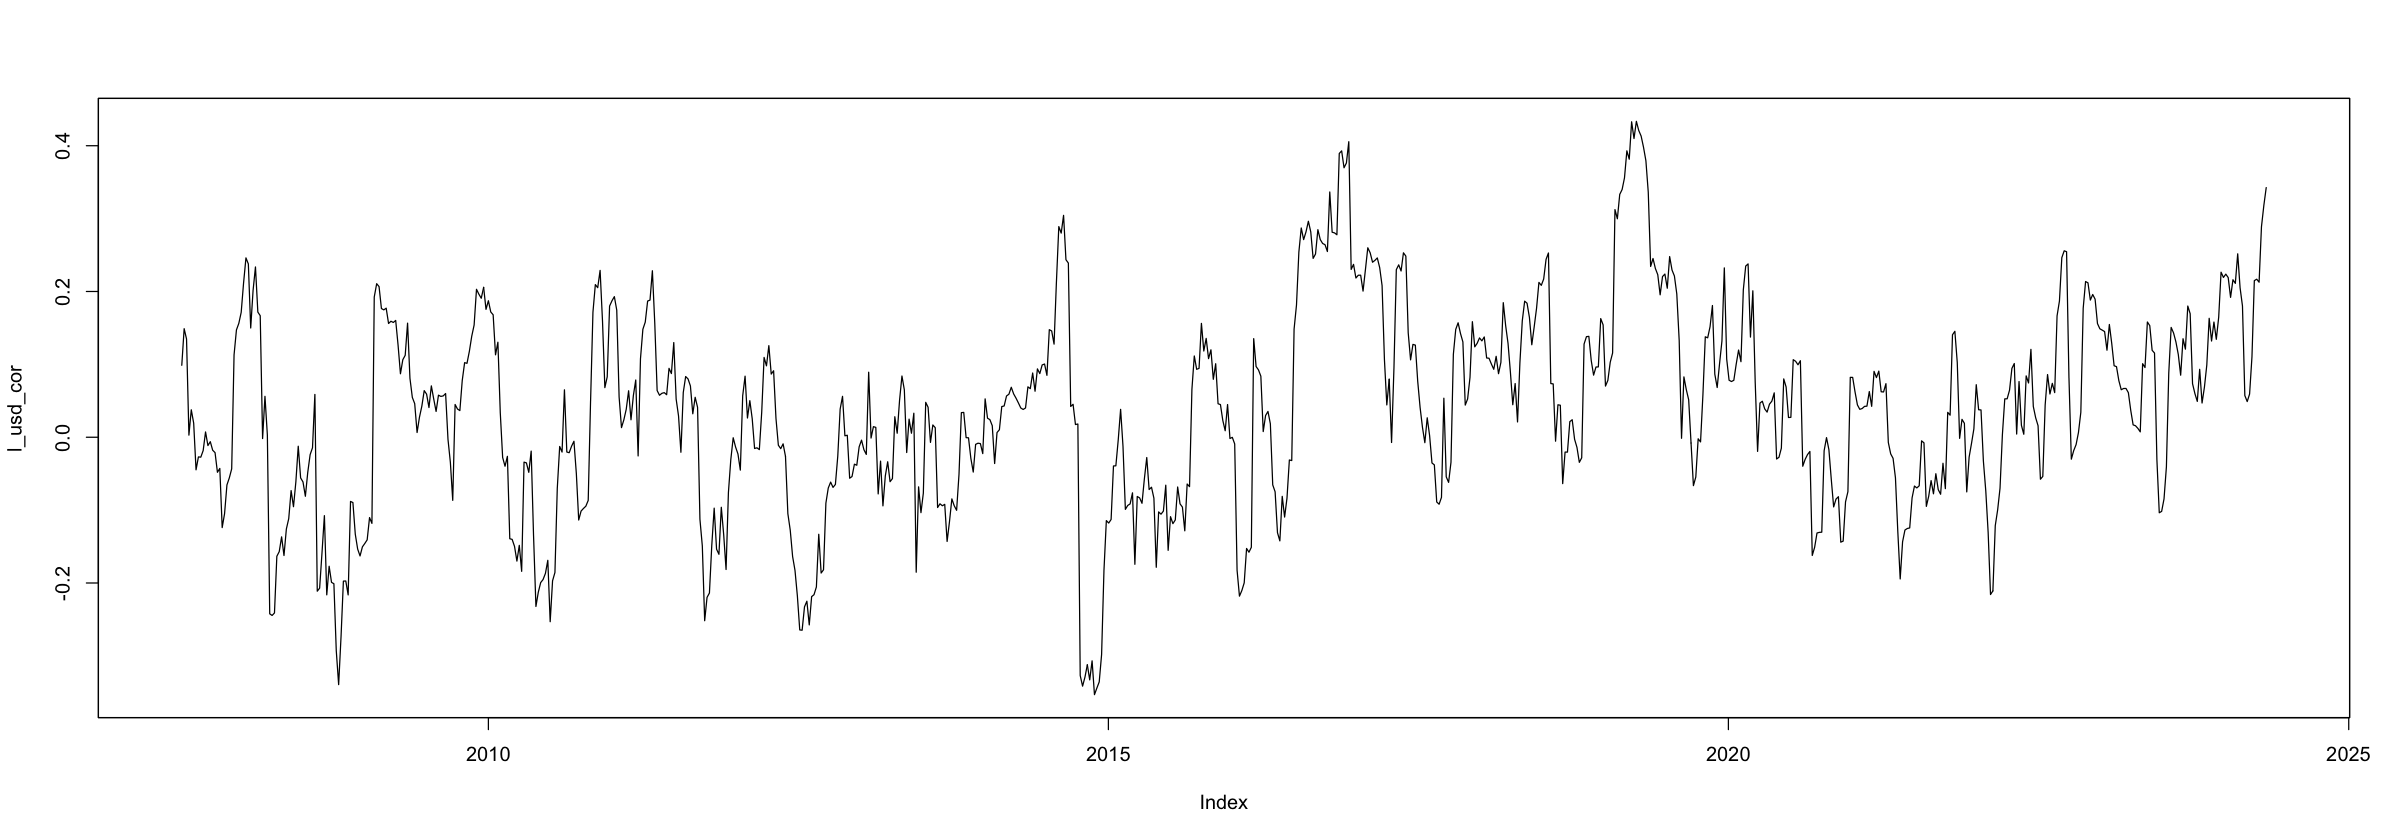

In [190]:
plot.zoo(l_usd_cor)

In [191]:
pdf("l_usd_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_usd_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

#### London Cocoa vs EUR correlation

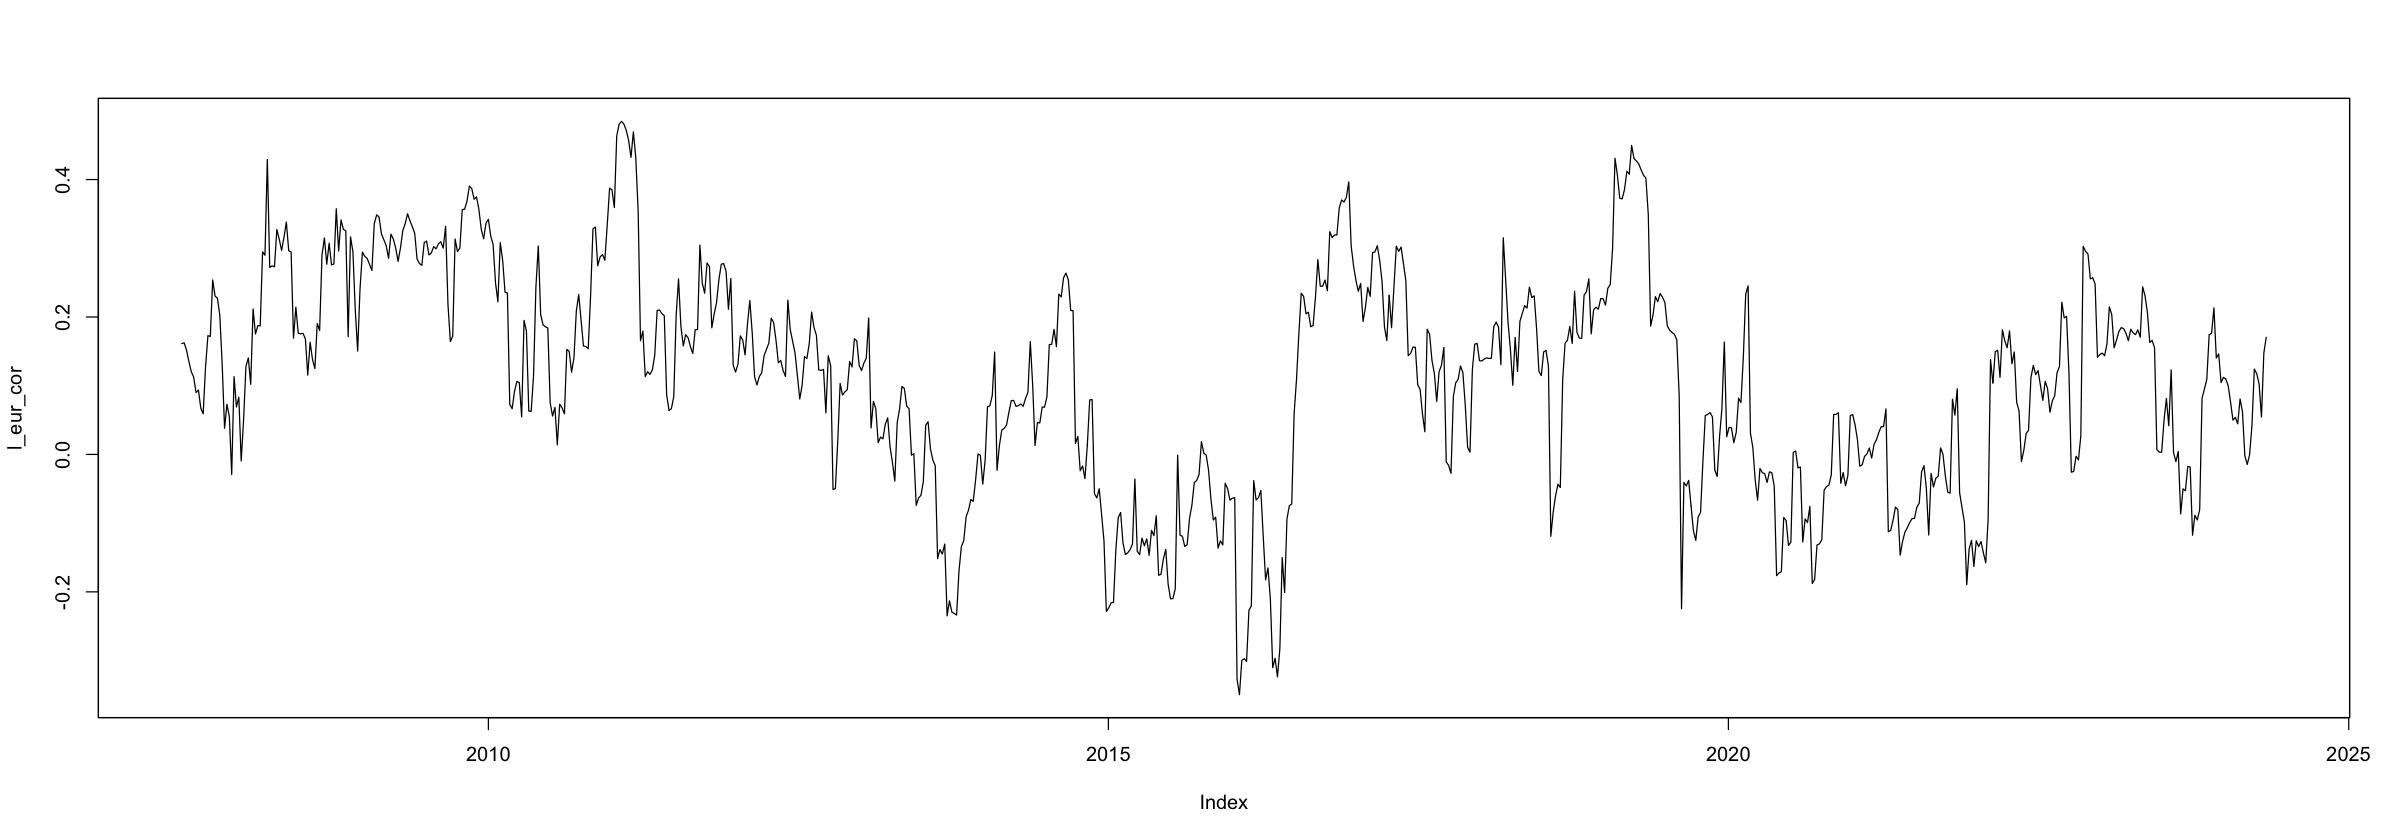

In [192]:
plot.zoo(l_eur_cor)

In [193]:
pdf("l_eur_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_eur_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

#### London Cocoa vs CHF correlation

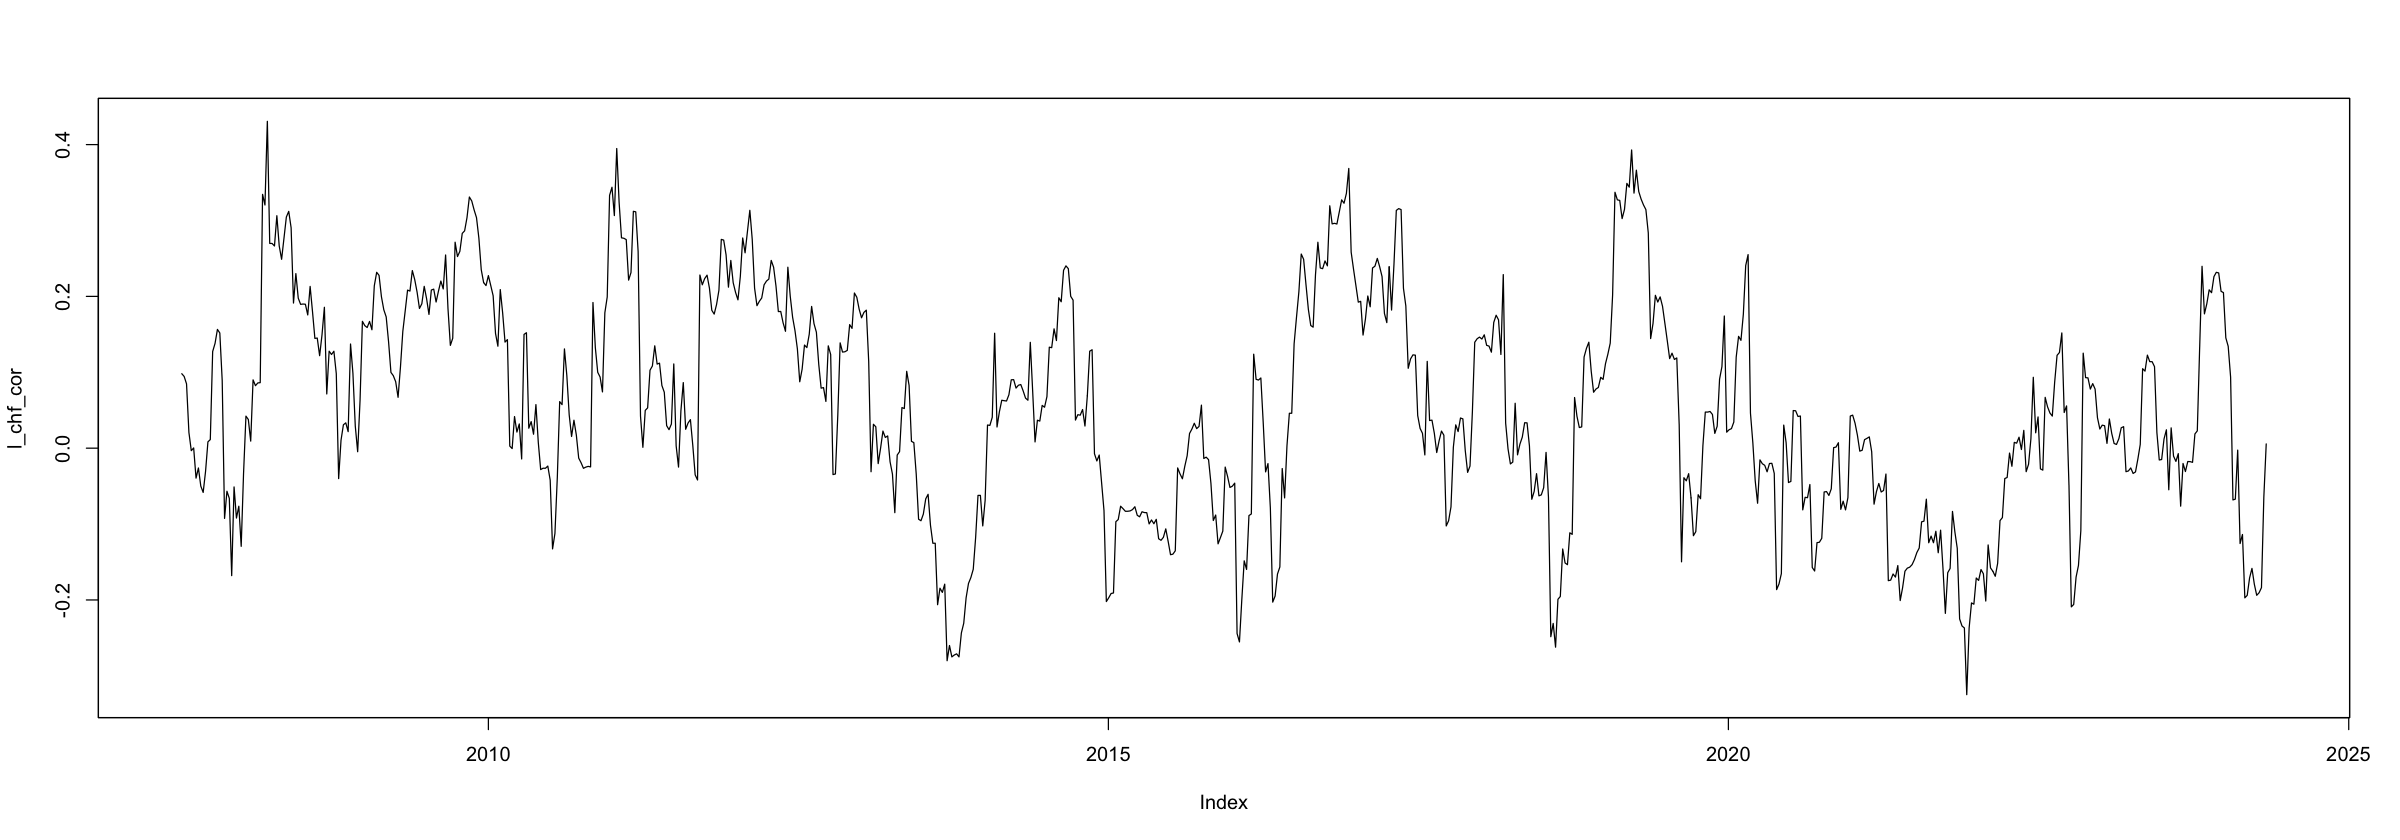

In [194]:
plot.zoo(l_chf_cor)

In [195]:
pdf("l_chf_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_chf_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

#### London Cocoa vs GHS correlation

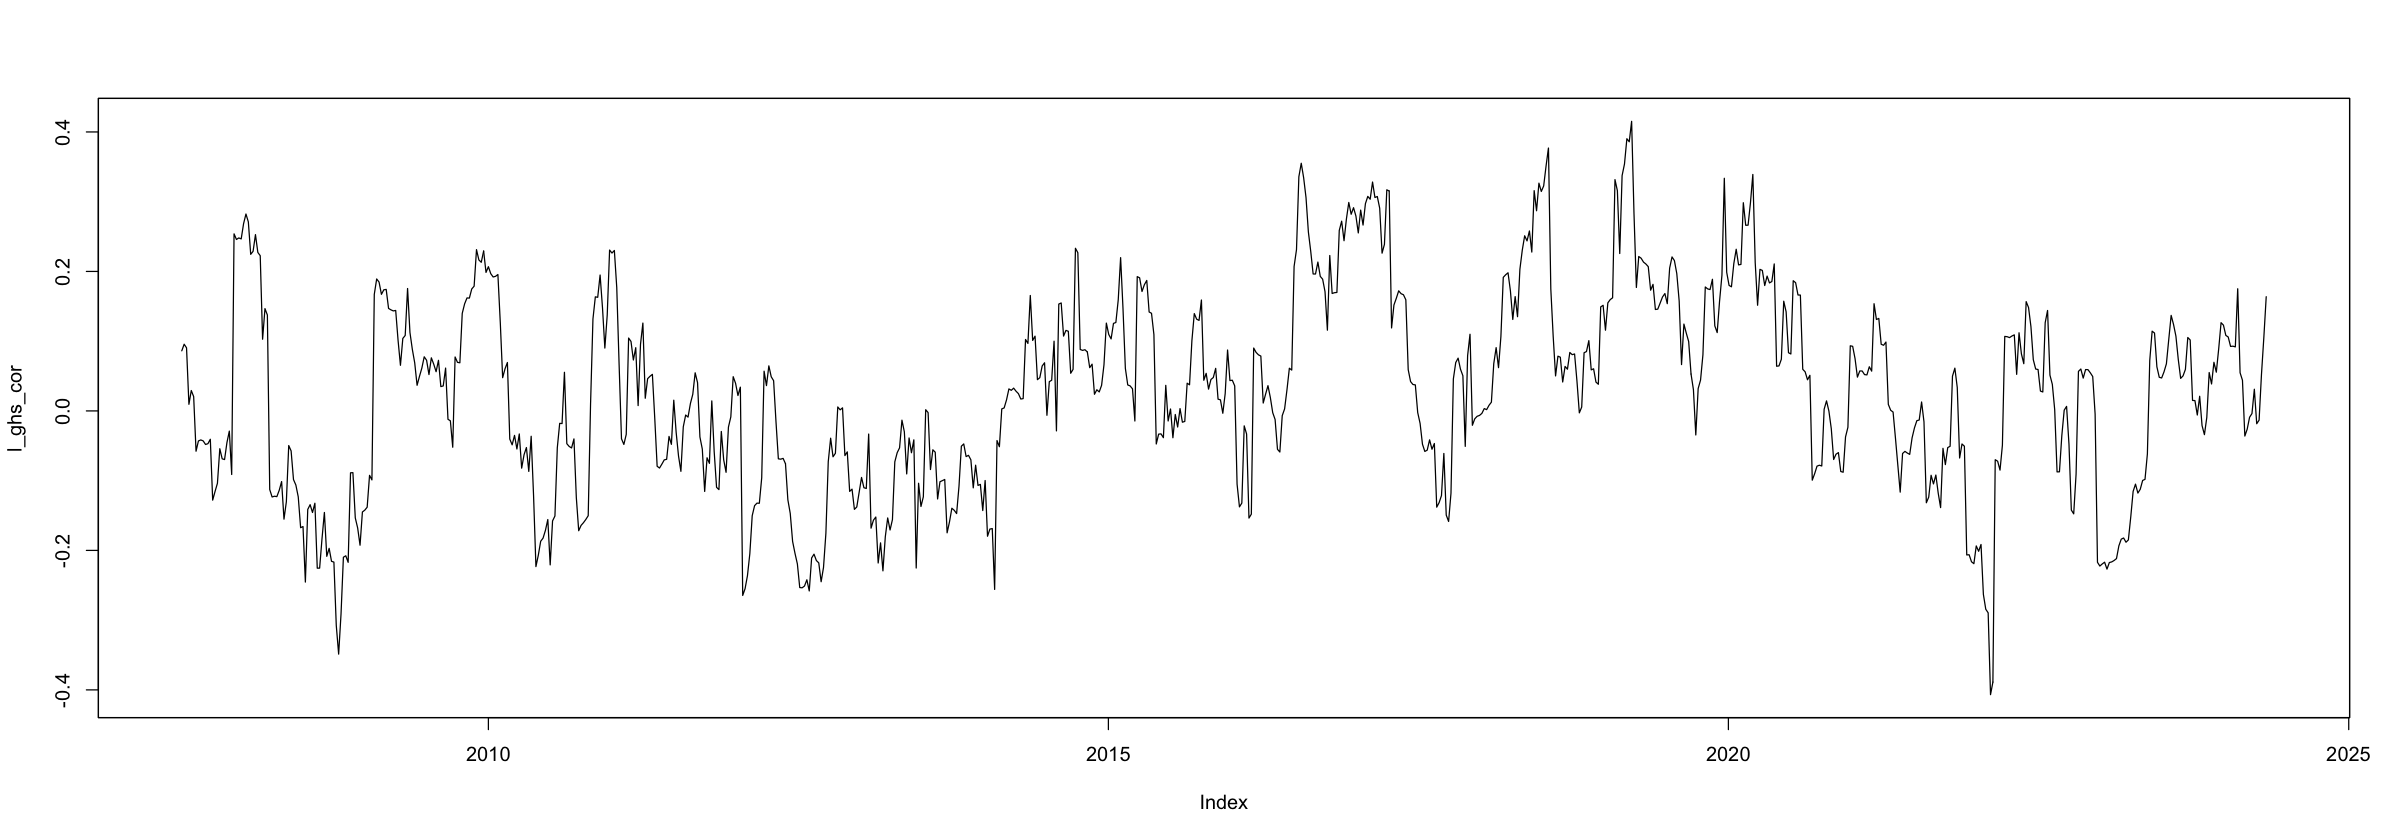

In [196]:
plot.zoo(l_ghs_cor)

In [197]:
pdf("l_ghs_w.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_ghs_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# VAR models (see Apendix A)

- ### (i) VAR for Cocoa futures (Table A.7)

In [198]:
dcc_fit_1@model$varcoef

,usc.l1,lc.l1,const
usc,-0.1553312,0.2479059,0.001260782
lc,-0.0730075,0.1580990,0.001851436


In [199]:
c_var <- varxfit(cr_w,p=1)
c_var$Bcoef
t(c_var$pstat)

,usc.l1,lc.l1,const
usc,-0.1553312,0.2479059,0.001260782
lc,-0.0730075,0.1580990,0.001851436


,usc.l1,lc.l1,const
usc,0.04677836,0.004863536,0.3421888
lc,0.29643519,0.044812559,0.1191391


- ### (ii) VAR for USD assets (Table A.10)

In [200]:
dcc_fit_us_t@model$varcoef

,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,const
usc,0.050001396,0.30612280,-0.15377774,-0.30238132,0.071715083,0.0017866584
eurusd,-0.008176897,0.10576647,0.01209512,-0.14268570,-0.002284233,-0.0001918788
gbpusd,0.012289331,0.09749489,-0.05227576,-0.09786695,-0.024854829,-0.0006189388
chfusd,-0.013293433,0.20381482,-0.01425397,-0.17069365,0.005808930,0.0004699575
ghsusd,0.011976600,-0.04817206,0.05194375,0.04116860,0.074579294,-0.0028628306


In [201]:
dcc_fit_us_n@model$varcoef

,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,const
usc,0.050001396,0.30612280,-0.15377774,-0.30238132,0.071715083,0.0017866584
eurusd,-0.008176897,0.10576647,0.01209512,-0.14268570,-0.002284233,-0.0001918788
gbpusd,0.012289331,0.09749489,-0.05227576,-0.09786695,-0.024854829,-0.0006189388
chfusd,-0.013293433,0.20381482,-0.01425397,-0.17069365,0.005808930,0.0004699575
ghsusd,0.011976600,-0.04817206,0.05194375,0.04116860,0.074579294,-0.0028628306


In [202]:
us_var <- varxfit(us_w,p=1)
us_var$Bcoef
t(us_var$pstat)

,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,const
usc,0.050001396,0.30612280,-0.15377774,-0.30238132,0.071715083,0.0017866584
eurusd,-0.008176897,0.10576647,0.01209512,-0.14268570,-0.002284233,-0.0001918788
gbpusd,0.012289331,0.09749489,-0.05227576,-0.09786695,-0.024854829,-0.0006189388
chfusd,-0.013293433,0.20381482,-0.01425397,-0.17069365,0.005808930,0.0004699575
ghsusd,0.011976600,-0.04817206,0.05194375,0.04116860,0.074579294,-0.0028628306


,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,const
usc,0.1711268,0.0636196264,0.2136275,0.0159139313,0.21855587,0.1832858443
eurusd,0.4884067,0.0472701053,0.7620339,0.0004287220,0.90343944,0.6581937277
gbpusd,0.3294309,0.0867597449,0.2202879,0.0236763904,0.21633089,0.1813659602
chfusd,0.3308123,0.0009646809,0.7580059,0.0002754154,0.78995909,0.3495235111
ghsusd,0.5717085,0.6145791605,0.4686195,0.5712107542,0.02728589,0.0002346016


- ### (iii) VAR for GBP assets (Table A.11)

In [203]:
dcc_fit_l_n@model$varcoef

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,const
lc,0.083127256,0.02540185,0.11659765,-0.17094355,0.08525104,0.0022119329
usdgbp,-0.015209669,-0.06734051,-0.08692464,0.09013655,0.02404885,0.0006285895
eurgbp,-0.019884400,-0.02965836,0.01407126,-0.04835976,0.02262786,0.0004276019
chfgbp,-0.021365788,-0.07568256,0.11109289,-0.07887719,0.02964781,0.0010792931
ghsgbp,-0.007357829,-0.19886410,-0.12683115,0.12832238,0.09883228,-0.0022233848


In [204]:
l_var <- varxfit(l_w,p=1)
l_var$Bcoef
t(l_var$pstat)

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,const
lc,0.083127256,0.02540185,0.11659765,-0.17094355,0.08525104,0.0022119329
usdgbp,-0.015209669,-0.06734051,-0.08692464,0.09013655,0.02404885,0.0006285895
eurgbp,-0.019884400,-0.02965836,0.01407126,-0.04835976,0.02262786,0.0004276019
chfgbp,-0.021365788,-0.07568256,0.11109289,-0.07887719,0.02964781,0.0010792931
ghsgbp,-0.007357829,-0.19886410,-0.12683115,0.12832238,0.09883228,-0.0022233848


,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,const
lc,0.01835334,0.82790029,0.4276188,0.12619918,0.10158570,0.06520747
usdgbp,0.26400517,0.13575333,0.1258147,0.03686406,0.23189379,0.17499535
eurgbp,0.09037314,0.44610583,0.7738272,0.19406318,0.19207904,0.28463616
chfgbp,0.15355416,0.12728807,0.0751731,0.09666164,0.18009517,0.03416713
ghsgbp,0.78626481,0.02705035,0.2623323,0.13590681,0.01368091,0.01606110
